<a href="https://colab.research.google.com/github/gracespalding/Data-Science/blob/main/Grace_Spalding_Stats_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

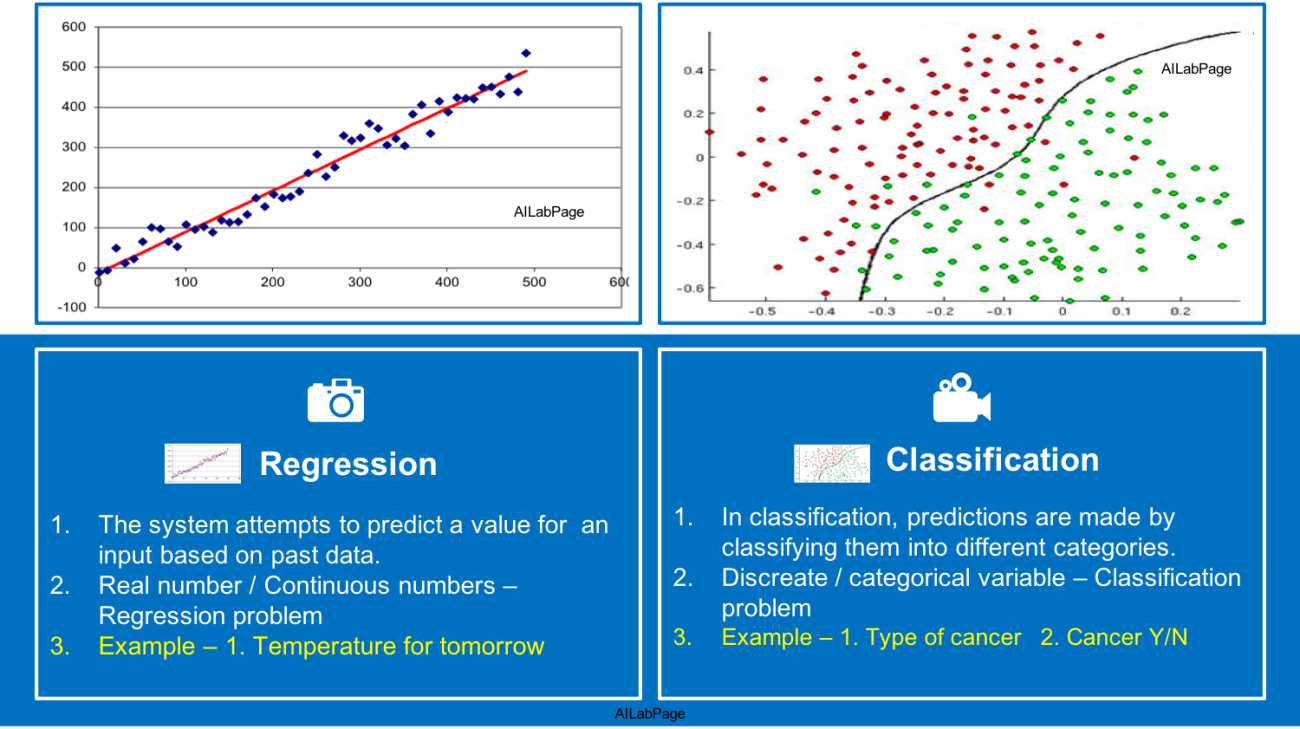

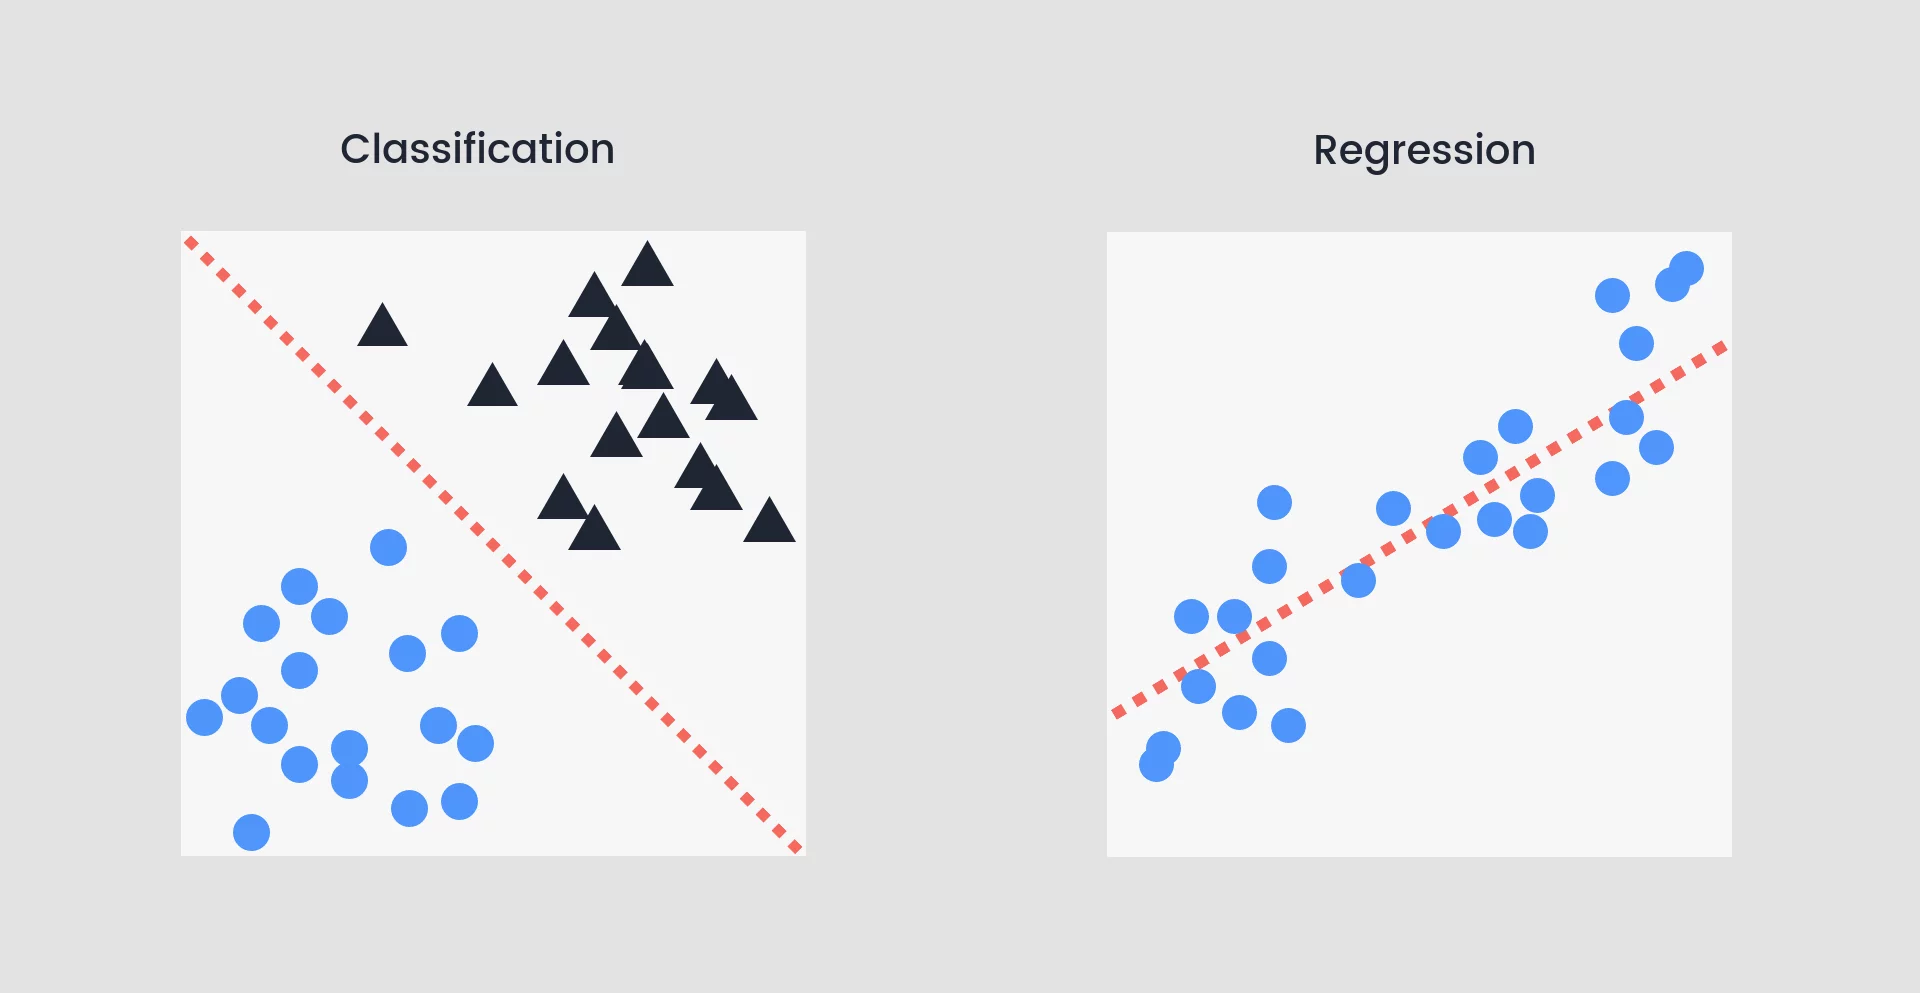

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

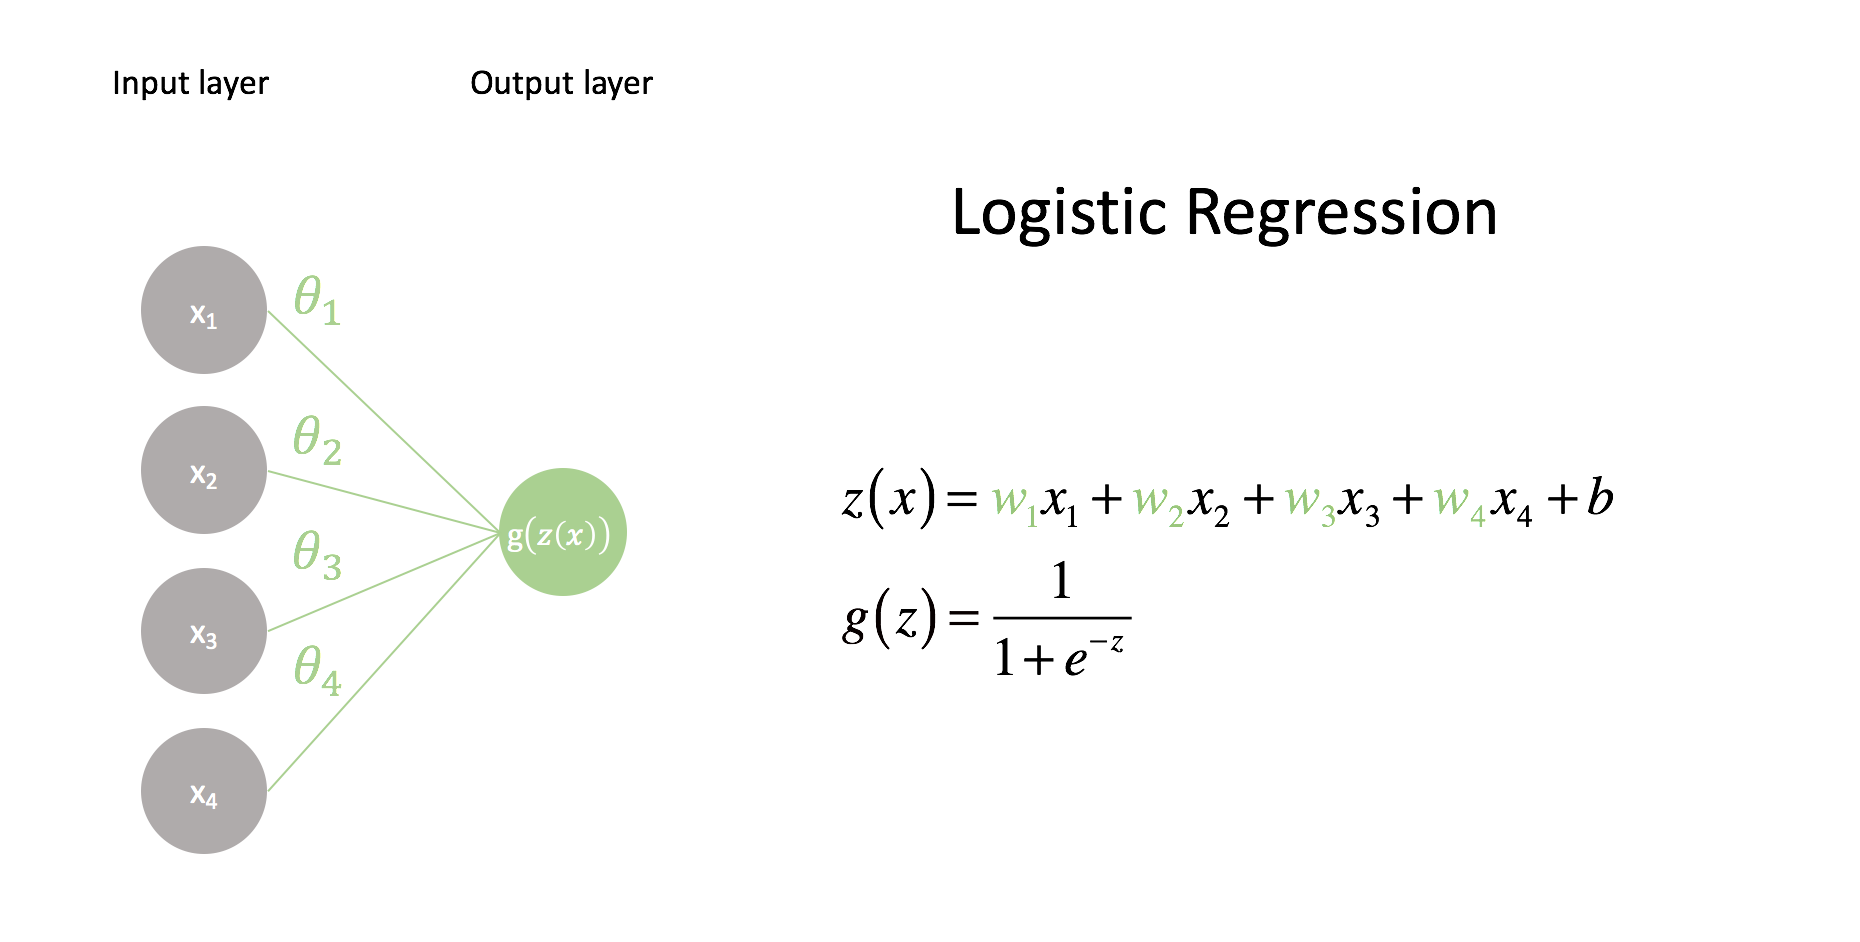

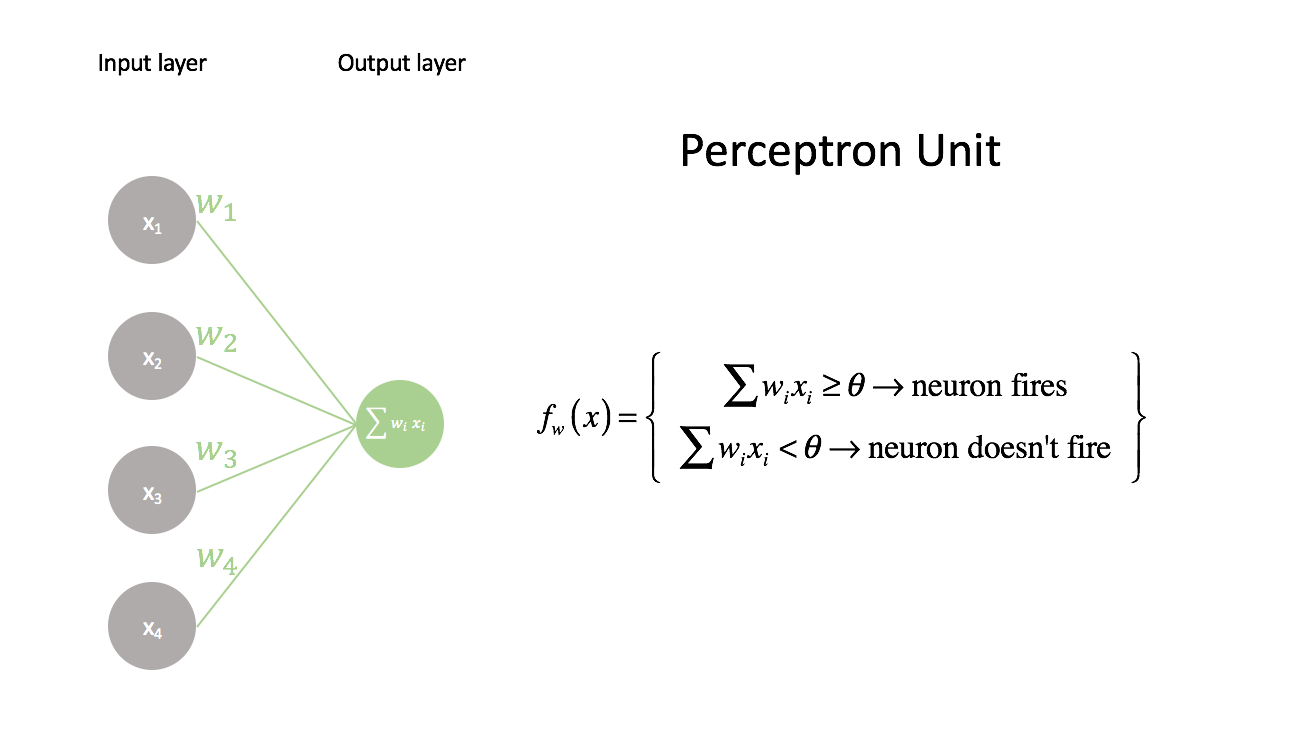

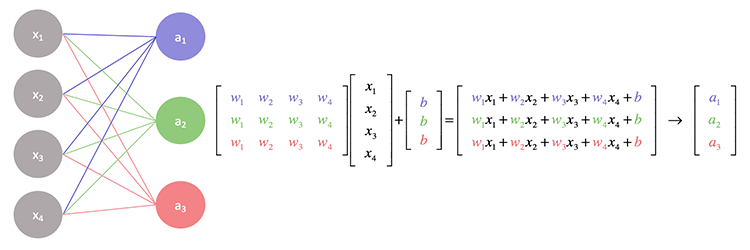

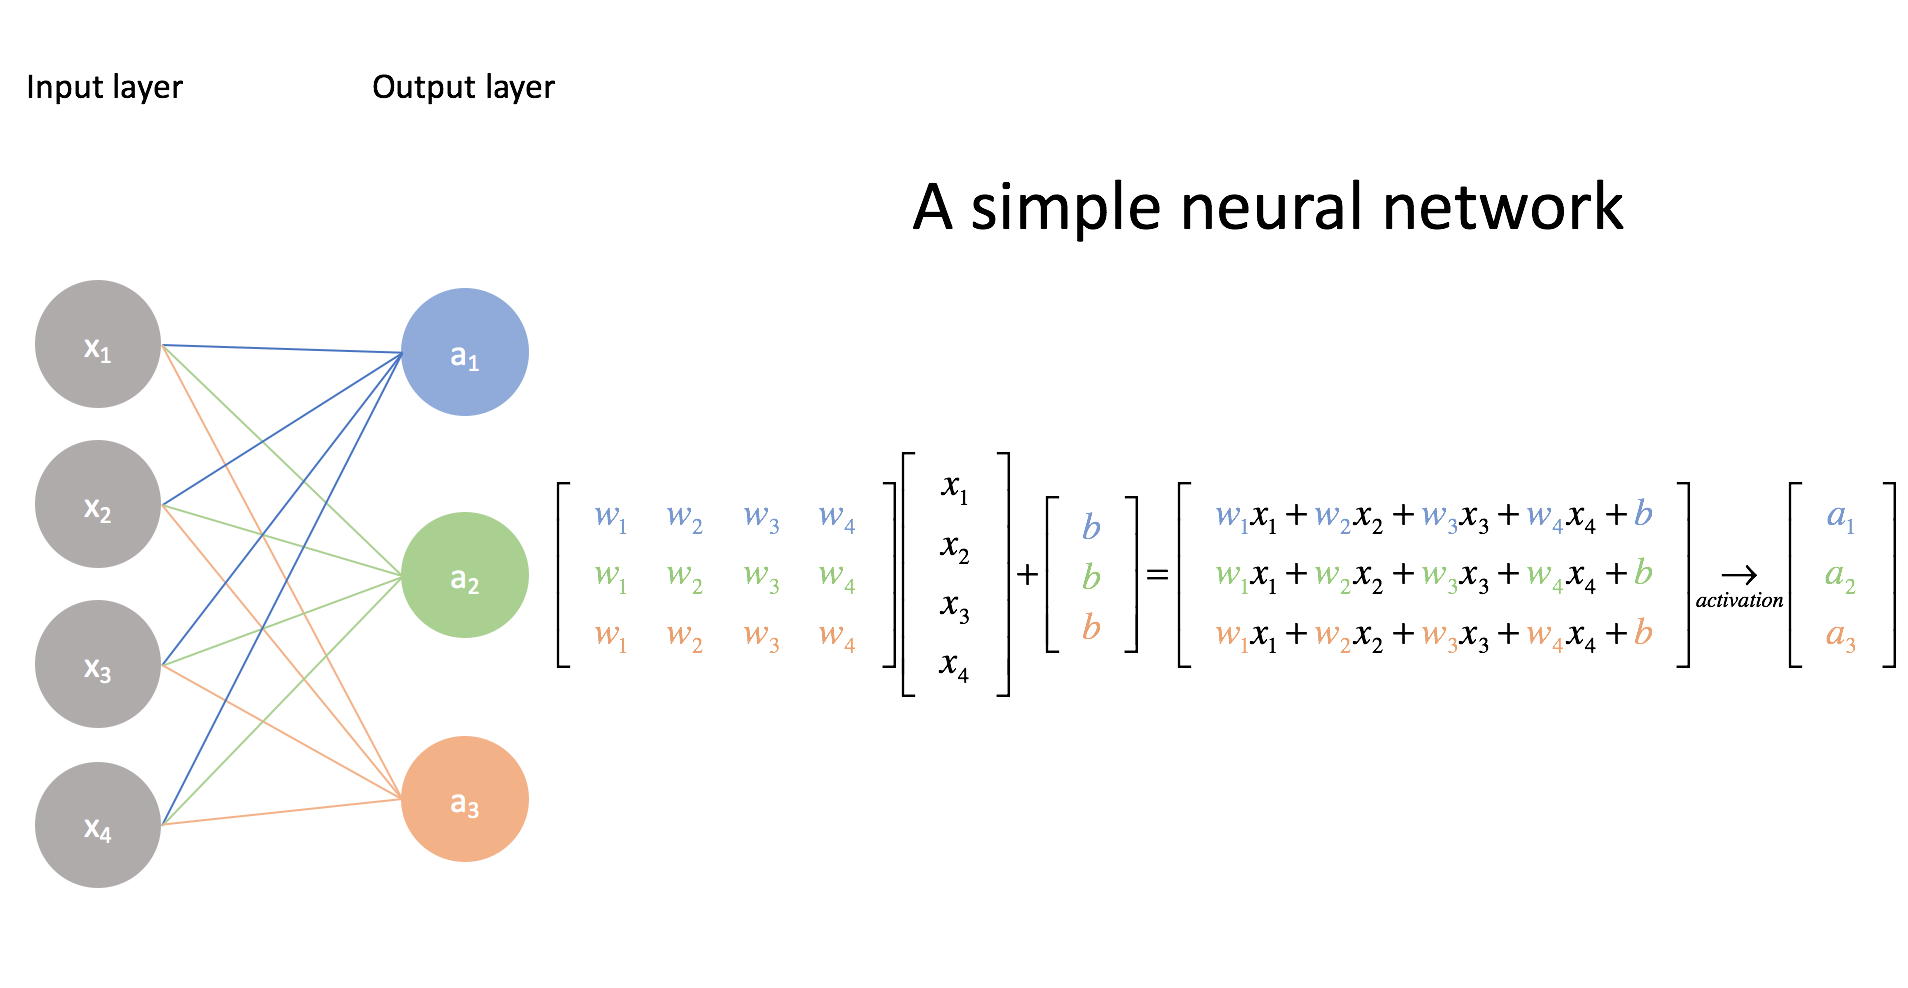

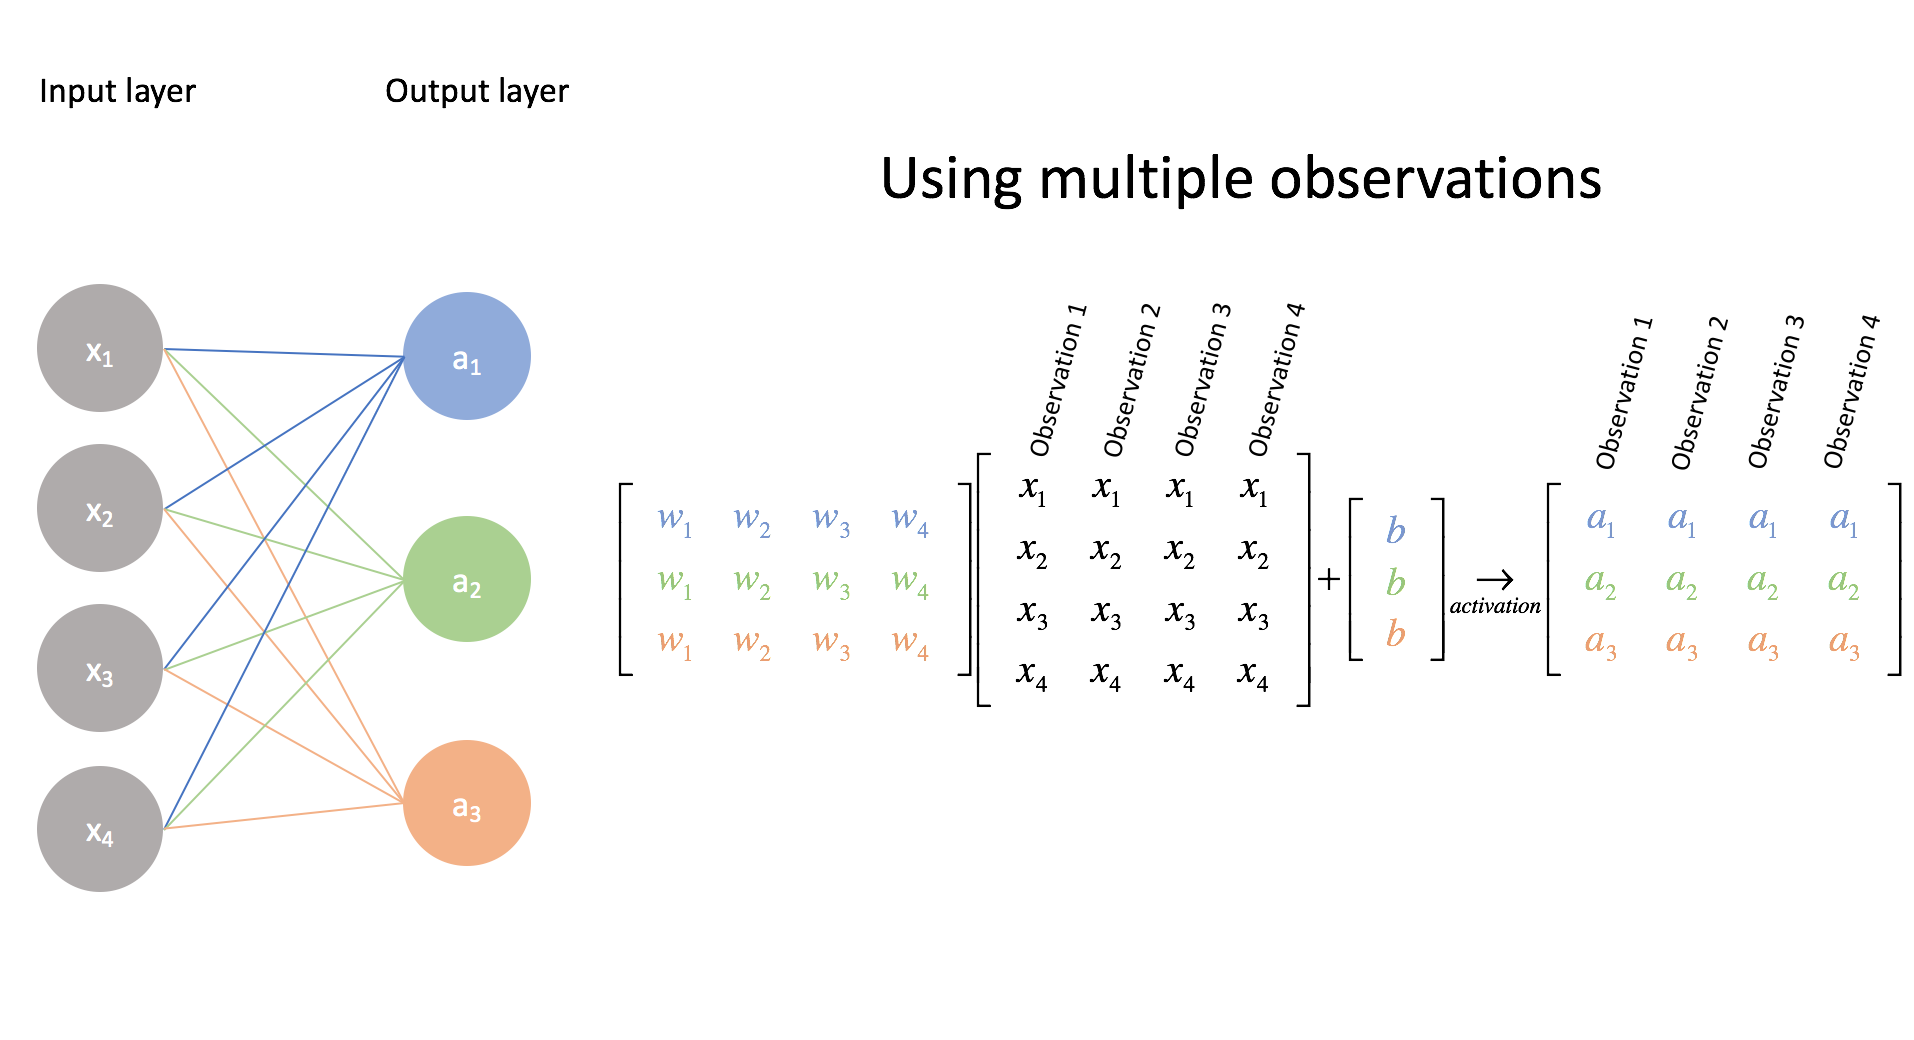

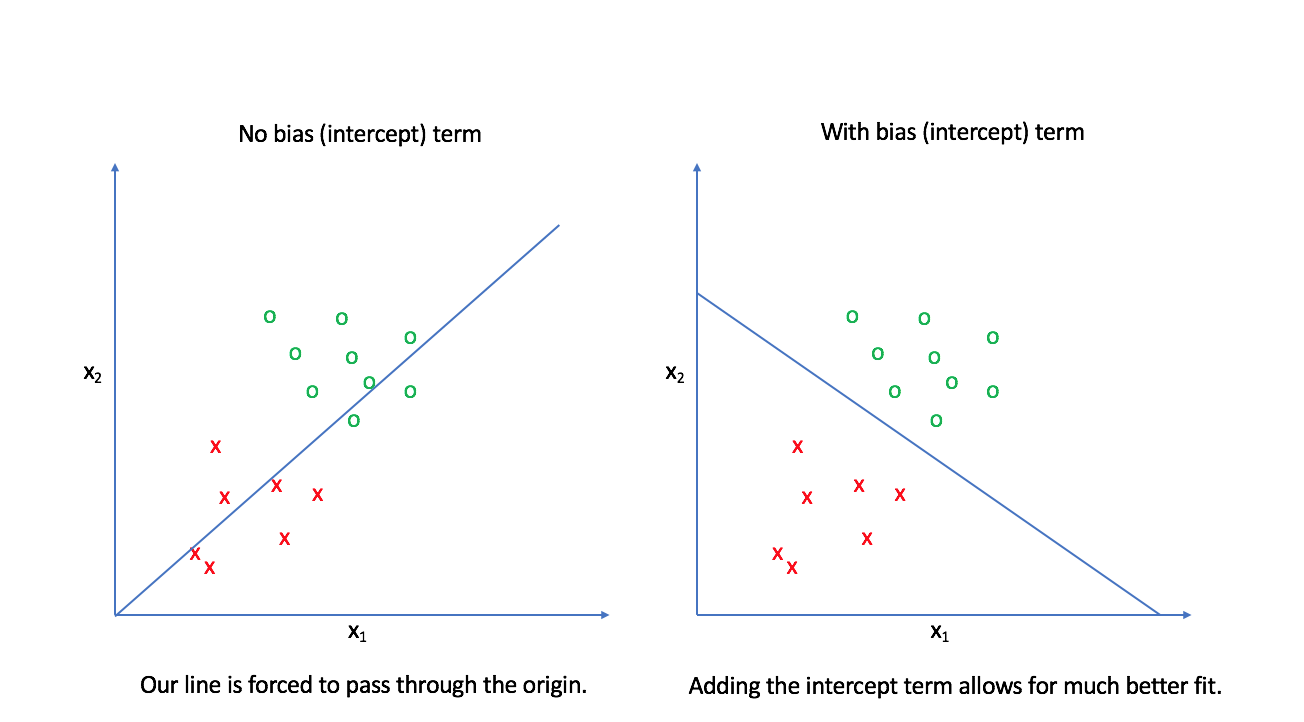

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np #Fundamnetal package of scientific computng in Python.
import matplotlib.pyplot as plt #A comprehensive library used for creating static, animated, and interactive visuals within Python.
!pip install wget
import wget #A convenient solution for downloading files over HTTP and FTP protocols.
import torch #An open source machine learning (ML) framework based on the Python programming language and the Torch library
import torch.nn as nn
from torch import tensor #A multi-dimensional matrix containing elements of a single data type.
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-uq0954fs
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-uq0954fs
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [ ]:
x = np.arange(0,9) #This creates an instance of np.array with evenly spaced values and returns the reference to it.

In [ ]:
x.shape #2 dimensional shape.

(9,)

In [ ]:
x = x[:,None] #Redefining x.

In [ ]:
x.shape 

(9, 1)

In [ ]:
y = 3*x-5 #Line of best fit, y = mx + b .

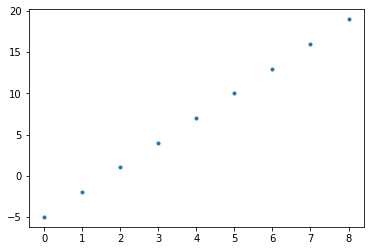

In [ ]:
plt.plot(x,y,'.') #Plotting a graph based on x and y. 

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) #Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [ ]:
m = Variable(randn(1,1), requires_grad=True) #Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 #Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  #Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() #Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() #Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

In [ ]:
loss.item() #Loss

0.0028578771743923426

In [ ]:
m.item() #Specific variables, m and b. Contributes to the loss.

2.994158983230591

In [ ]:
b.item()

-4.9673171043396

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


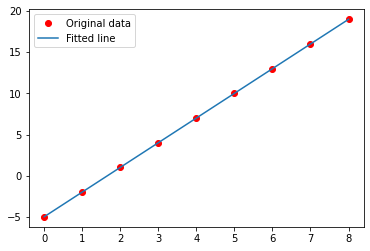

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model #This code has ben definined above.

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight #Specific parameters with torch.

Parameter containing:
tensor([[2.9967]], requires_grad=True)

In [ ]:
model.bias 

Parameter containing:
tensor([-4.9815], requires_grad=True)

In [ ]:
def GPU(data): #GPU provides a driver and runtime API for existing toolkits and libraries to simplify GPU-based accelerated processing.
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x): #Defining a plot based on the GPU with torch tensor. 
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x): #Plot fc have several triangle shaped rows of dots on the plot.
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x): #Plotting a montage.
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y): #A one hot encoding is a representation of categorical variables as binary vectors.
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
##MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy() #Defining X and Y as well as rhe tests for each data point.
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape #4 dimension shape.

(60000, 1, 28, 28)

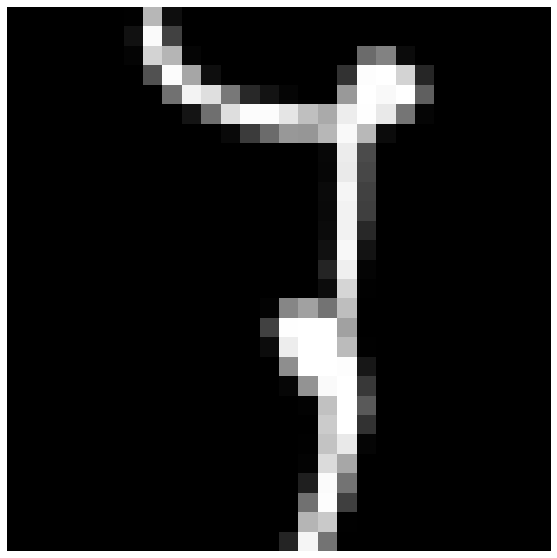

In [ ]:
plot(X[123,0,0:28,0:28]) #Plotting the image of X.

In [ ]:
Y[123] #The value associated with y at 123.

2

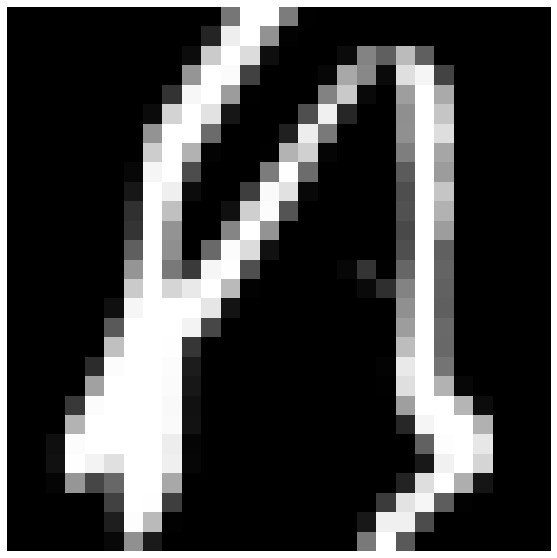

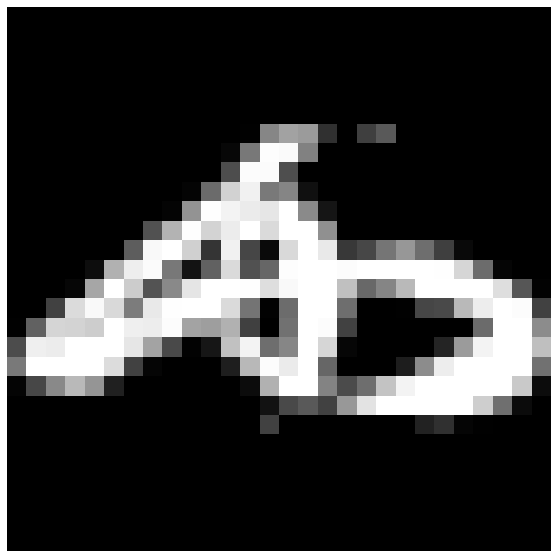

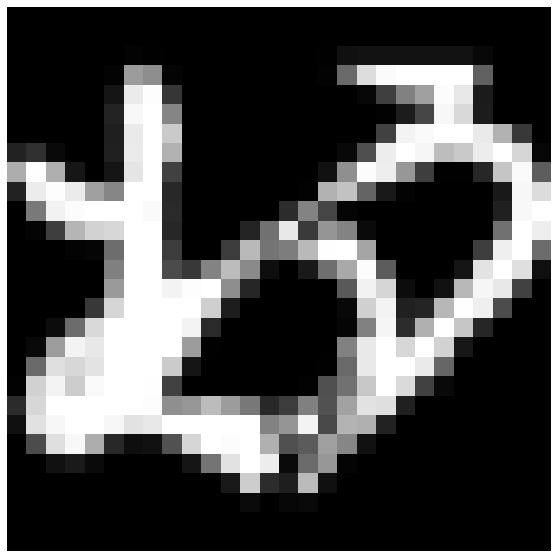

In [ ]:
for i in range(3):
    plot(X[i,0,:,:]) #Plotting X with a specific range. 3 images are shown.

In [ ]:
Y #The array for Y values.

array([8, 7, 0, ..., 0, 4, 9])

In [ ]:
X[0:25,0,:,:].shape #Three dimensional shape.

(25, 28, 28)

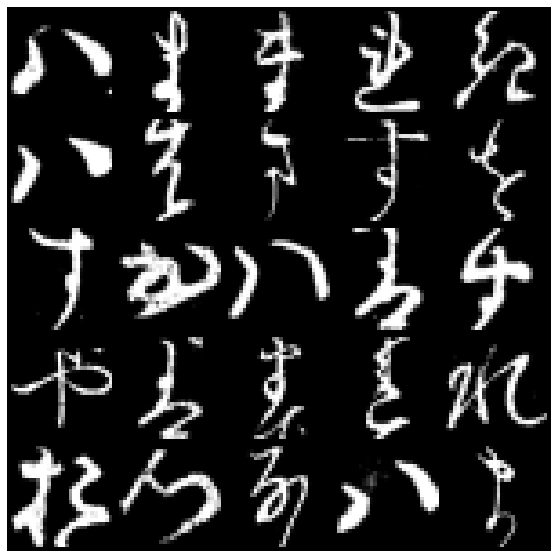

In [ ]:
montage_plot(X[125:150,0,:,:]) #A montage of all the images X can make using the data.

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape #Coordinates for the image.

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
28*28

784

In [ ]:
X = X.reshape(X.shape[0],784) #Dedefining X.
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape #Putting all of the data together.

((60000, 784), (10000, 784))

In [ ]:
X[0] #The array of all of the values associated with X.

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4627451 , 1.        , 1.        , 0.48627451,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14117647, 0.93333333,
       1.        , 0.57254902, 0.00784314, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04705882, 0.79607843, 1.        , 0.8627451 , 0.05490196,
       0.        , 0.        , 0.        , 0.04313725, 0.51764

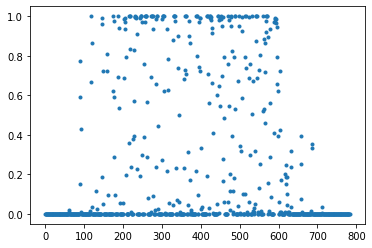

In [ ]:
plt.plot(X[100],'.') #Here is the plot dispalying this array of values. 

(array([548.,  11.,  17.,  18.,  15.,  17.,  16.,  14.,  16., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

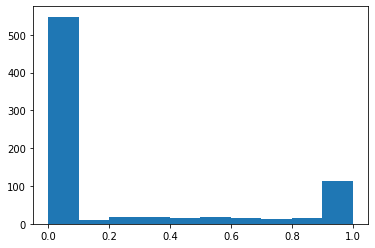

In [ ]:
plt.hist(X[0]) #A histogram of the values in the array.

In [ ]:
X = GPU_data(X) #Defining X and Y with its GPU data.
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  #Adding a new source of data.
wget.download(url,"W.data")

'W (5).data'

In [ ]:
W = torch.load("W.data") #Definibg W, a new variable for torch.

In [ ]:
W.shape #Shape of the data based on dimensions. 

torch.Size([784, 10])

In [ ]:
X.shape 

torch.Size([60000, 784])

In [ ]:
def plot(x): #Parameters for the plot.
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

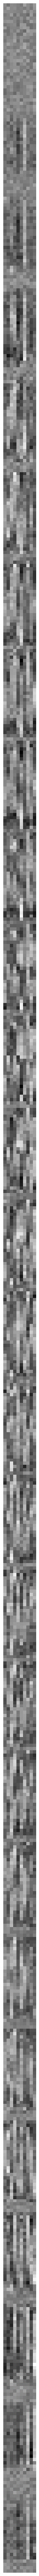

In [ ]:
plot(W[0:784,:10])

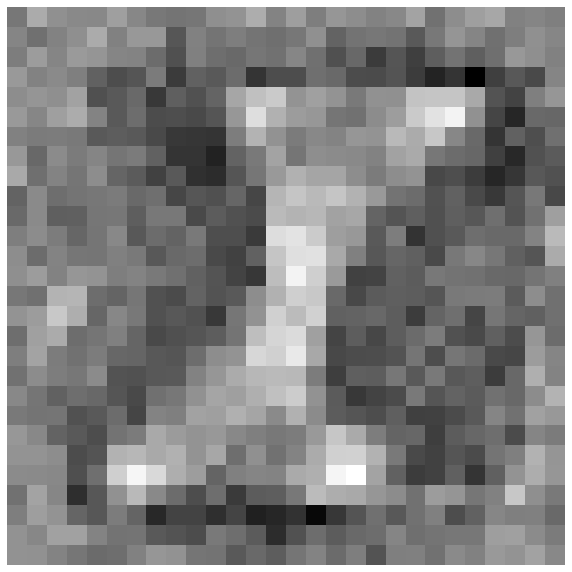

In [ ]:
plot(W[:,1].reshape(28,28))

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000 #Defining a value for b.

def get_batch(mode): #A batch is a grouping of instances from your dataset.
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train') #A batch is a grouping of instances from your dataset.

In [ ]:
x.shape

torch.Size([1000, 784])

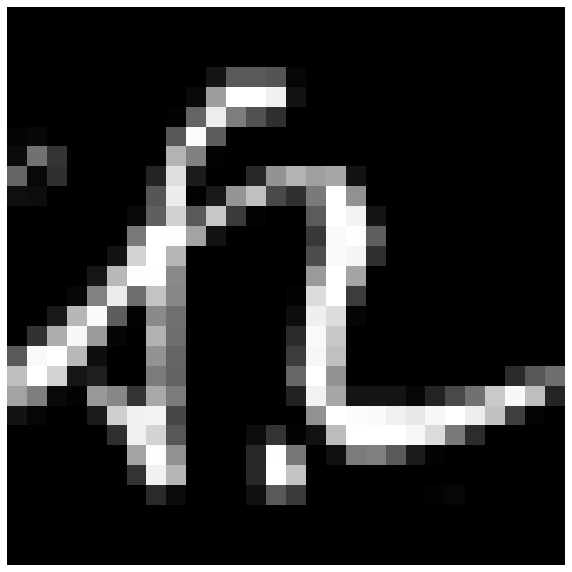

In [ ]:
plot(x[0].reshape(28,28))

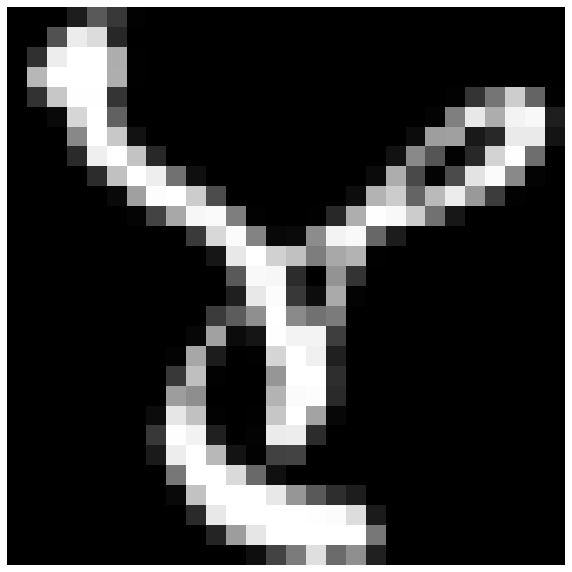

In [ ]:
plot(x[1].reshape(28,28))

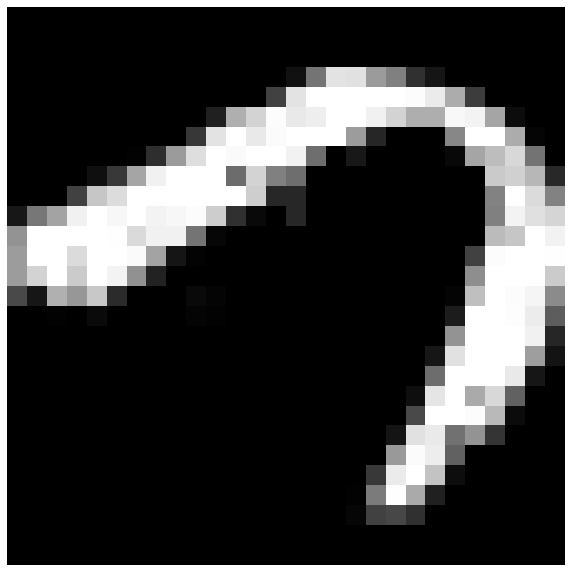

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y #Values used to create Y.

tensor([8., 9., 3., 9., 3., 6., 0., 1., 4., 0., 5., 2., 3., 0., 4., 4., 6., 2.,
        7., 0., 8., 6., 7., 7., 9., 4., 9., 6., 1., 0., 9., 0., 2., 1., 0., 7.,
        0., 9., 7., 7., 2., 1., 7., 8., 2., 1., 4., 0., 9., 5., 7., 2., 9., 0.,
        4., 7., 4., 6., 5., 1., 4., 4., 8., 1., 2., 3., 3., 5., 7., 6., 9., 8.,
        7., 1., 8., 7., 9., 1., 6., 7., 3., 7., 8., 2., 4., 3., 1., 5., 1., 7.,
        5., 5., 7., 7., 3., 5., 3., 0., 8., 4., 4., 2., 0., 7., 4., 1., 4., 7.,
        6., 5., 3., 4., 1., 8., 2., 4., 0., 5., 5., 2., 0., 2., 0., 8., 4., 4.,
        7., 7., 3., 5., 7., 5., 2., 5., 7., 2., 4., 5., 1., 5., 8., 1., 4., 5.,
        7., 2., 4., 6., 2., 8., 3., 2., 7., 1., 2., 2., 1., 6., 5., 0., 8., 6.,
        4., 9., 5., 1., 3., 2., 1., 5., 3., 5., 6., 5., 7., 2., 0., 9., 6., 9.,
        7., 0., 9., 5., 0., 1., 3., 1., 0., 7., 7., 3., 5., 8., 3., 0., 3., 6.,
        5., 0., 7., 0., 0., 3., 9., 5., 1., 3., 9., 6., 3., 2., 6., 9., 8., 3.,
        1., 5., 4., 2., 3., 5., 3., 2., 

In [ ]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape #Combining x and w.

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

21.7 µs ± 284 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[ -7.4739, -10.1522,   2.4974,  ...,  -3.1331,  -7.5430,  -8.0561],
        [-14.4107, -15.6781, -12.8190,  ...,   1.3859,  -2.6624,  -7.0220],
        [-13.1312, -24.5205,  -3.4115,  ..., -11.7440,  -7.9571, -29.9146],
        ...,
        [-11.6340,  -6.1230,  -8.7643,  ...,   4.5466,  -8.7148,   7.7180],
        [-15.7657,  -7.1790,   1.7028,  ...,  -2.8581,  -9.7206,  -7.5928],
        [ -3.5917,  -3.2171,   4.4215,  ...,   3.0227,   0.7732,  -7.5930]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W 

In [ ]:
y2.shape

torch.Size([1000, 10])

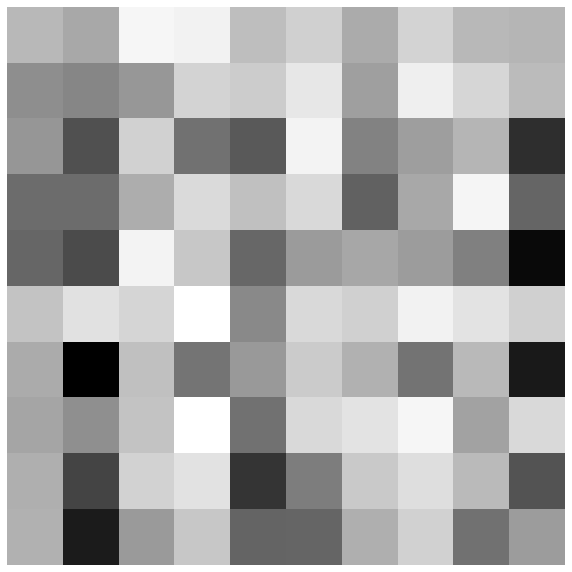

In [ ]:
plot(y2[0:10,:])

In [ ]:
y

tensor([8., 9., 3., 9., 3., 6., 0., 1., 4., 0., 5., 2., 3., 0., 4., 4., 6., 2.,
        7., 0., 8., 6., 7., 7., 9., 4., 9., 6., 1., 0., 9., 0., 2., 1., 0., 7.,
        0., 9., 7., 7., 2., 1., 7., 8., 2., 1., 4., 0., 9., 5., 7., 2., 9., 0.,
        4., 7., 4., 6., 5., 1., 4., 4., 8., 1., 2., 3., 3., 5., 7., 6., 9., 8.,
        7., 1., 8., 7., 9., 1., 6., 7., 3., 7., 8., 2., 4., 3., 1., 5., 1., 7.,
        5., 5., 7., 7., 3., 5., 3., 0., 8., 4., 4., 2., 0., 7., 4., 1., 4., 7.,
        6., 5., 3., 4., 1., 8., 2., 4., 0., 5., 5., 2., 0., 2., 0., 8., 4., 4.,
        7., 7., 3., 5., 7., 5., 2., 5., 7., 2., 4., 5., 1., 5., 8., 1., 4., 5.,
        7., 2., 4., 6., 2., 8., 3., 2., 7., 1., 2., 2., 1., 6., 5., 0., 8., 6.,
        4., 9., 5., 1., 3., 2., 1., 5., 3., 5., 6., 5., 7., 2., 0., 9., 6., 9.,
        7., 0., 9., 5., 0., 1., 3., 1., 0., 7., 7., 3., 5., 8., 3., 0., 3., 6.,
        5., 0., 7., 0., 0., 3., 9., 5., 1., 3., 9., 6., 3., 2., 6., 9., 8., 3.,
        1., 5., 4., 2., 3., 5., 3., 2., 

In [ ]:
one_hot(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


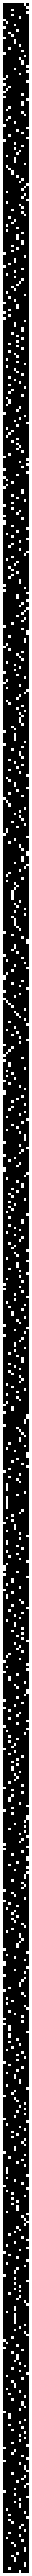

In [ ]:
plot(one_hot(y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


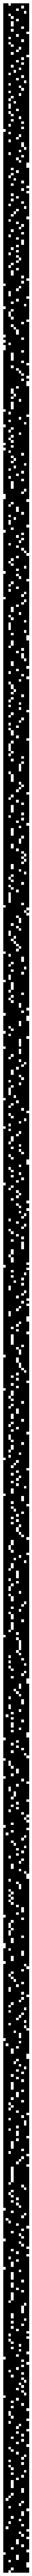

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

tensor([8., 9., 3., 9., 3., 6., 0., 1., 4., 0., 5., 2., 3., 0., 4., 4., 6., 2.,
        7., 0., 8., 6., 7., 7., 9., 4., 9., 6., 1., 0., 9., 0., 2., 1., 0., 7.,
        0., 9., 7., 7., 2., 1., 7., 8., 2., 1., 4., 0., 9., 5., 7., 2., 9., 0.,
        4., 7., 4., 6., 5., 1., 4., 4., 8., 1., 2., 3., 3., 5., 7., 6., 9., 8.,
        7., 1., 8., 7., 9., 1., 6., 7., 3., 7., 8., 2., 4., 3., 1., 5., 1., 7.,
        5., 5., 7., 7., 3., 5., 3., 0., 8., 4., 4., 2., 0., 7., 4., 1., 4., 7.,
        6., 5., 3., 4., 1., 8., 2., 4., 0., 5., 5., 2., 0., 2., 0., 8., 4., 4.,
        7., 7., 3., 5., 7., 5., 2., 5., 7., 2., 4., 5., 1., 5., 8., 1., 4., 5.,
        7., 2., 4., 6., 2., 8., 3., 2., 7., 1., 2., 2., 1., 6., 5., 0., 8., 6.,
        4., 9., 5., 1., 3., 2., 1., 5., 3., 5., 6., 5., 7., 2., 0., 9., 6., 9.,
        7., 0., 9., 5., 0., 1., 3., 1., 0., 7., 7., 3., 5., 8., 3., 0., 3., 6.,
        5., 0., 7., 0., 0., 3., 9., 5., 1., 3., 9., 6., 3., 2., 6., 9., 8., 3.,
        1., 5., 4., 2., 3., 5., 3., 2., 

In [ ]:
torch.argmax(y2,1)

tensor([2, 7, 5, 8, 2, 3, 5, 3, 3, 7, 3, 9, 5, 2, 7, 2, 3, 6, 5, 3, 9, 7, 5, 7,
        3, 6, 4, 2, 7, 5, 8, 2, 6, 7, 2, 6, 3, 2, 4, 2, 2, 5, 2, 3, 6, 3, 7, 2,
        7, 0, 2, 6, 5, 2, 7, 7, 8, 6, 2, 7, 5, 6, 9, 9, 3, 5, 3, 2, 4, 7, 3, 9,
        7, 9, 3, 5, 3, 7, 2, 8, 5, 4, 3, 9, 2, 5, 7, 6, 3, 7, 2, 5, 7, 7, 5, 3,
        5, 2, 5, 6, 5, 3, 2, 5, 3, 3, 7, 9, 7, 0, 6, 5, 2, 2, 9, 5, 3, 8, 0, 3,
        2, 2, 3, 9, 7, 3, 4, 5, 5, 0, 7, 0, 2, 0, 0, 7, 3, 3, 3, 7, 9, 3, 5, 6,
        7, 9, 7, 9, 9, 5, 3, 3, 4, 3, 6, 3, 3, 3, 0, 2, 9, 6, 2, 8, 0, 3, 2, 6,
        3, 2, 3, 0, 3, 0, 2, 7, 3, 4, 3, 8, 4, 2, 7, 5, 2, 7, 3, 3, 3, 8, 7, 0,
        0, 9, 3, 2, 5, 5, 7, 2, 4, 2, 2, 9, 3, 0, 7, 5, 7, 6, 2, 5, 7, 8, 9, 5,
        3, 2, 3, 8, 5, 0, 5, 6, 9, 3, 2, 5, 2, 8, 7, 0, 8, 7, 5, 3, 3, 6, 2, 3,
        8, 2, 2, 2, 8, 3, 9, 9, 3, 3, 2, 7, 5, 7, 7, 8, 3, 3, 9, 5, 2, 7, 9, 6,
        2, 3, 3, 4, 3, 7, 3, 2, 6, 2, 6, 9, 3, 2, 7, 6, 2, 5, 2, 3, 3, 5, 9, 3,
        2, 2, 2, 3, 2, 7, 3, 7, 6, 6, 6,

In [ ]:
b

1000

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0760, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
%%timeit
X[20000]@W

24.5 µs ± 799 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
torch.argmax(X@W,1) #Returns the indices of the maximum value of all elements in the input tensor.

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0789, device='cuda:0')

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

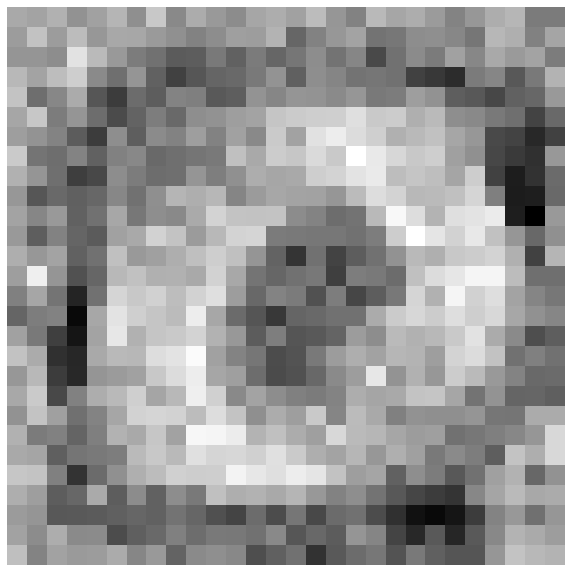

In [ ]:
plot(W[:,0].reshape(28,28))

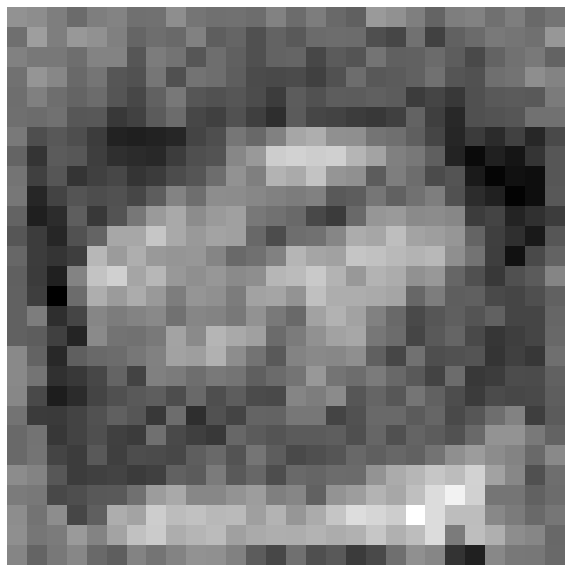

In [ ]:
plot(W[:,9].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

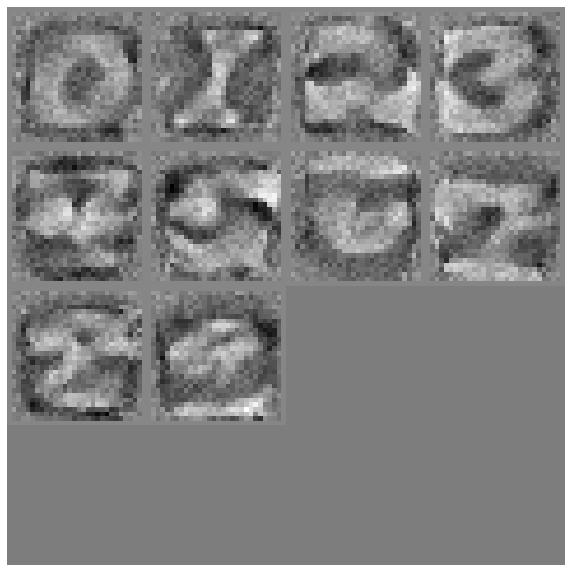

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x): #Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities.
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels): #Cross-Entropy Loss is also known as the Negative Log Likelihood. This is most commonly used for classification problems.         
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
%%html #Images of the plots being ran with data.
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): #Truncated normal numbers.

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y): #The average training accuracy at the end of an epoch. 
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode): #A batch is a grouping of instances from your dataset.
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w): #Defining the model based on the data.

    return x@w[0]

In [ ]:
def make_plots(): #Making plots based on the datas.
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


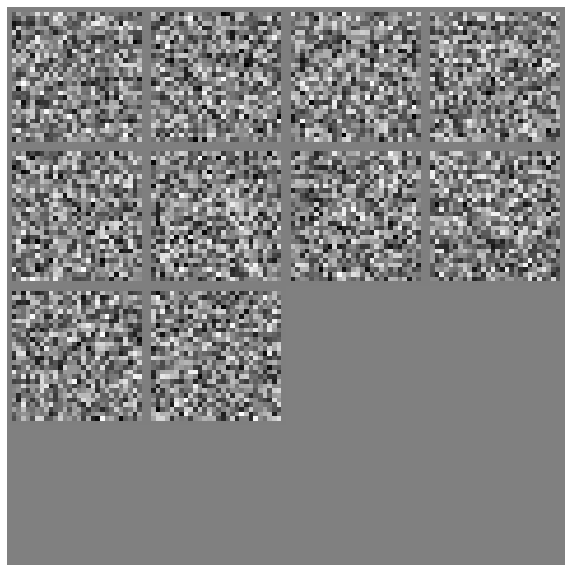

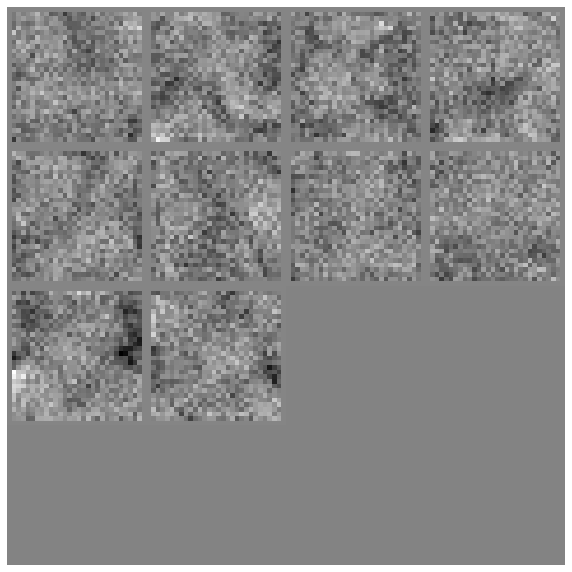

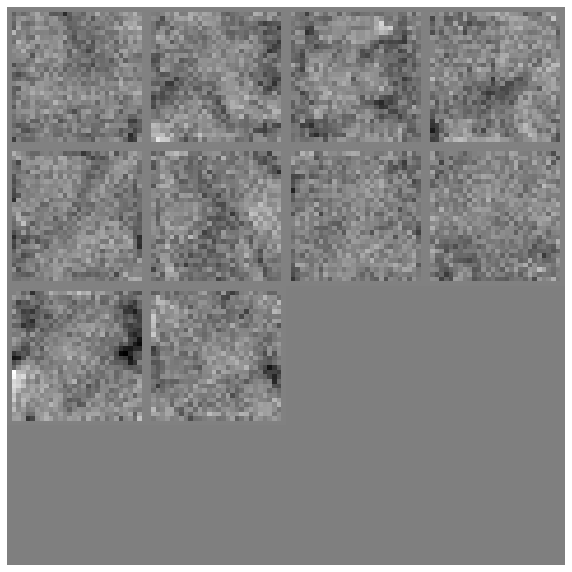

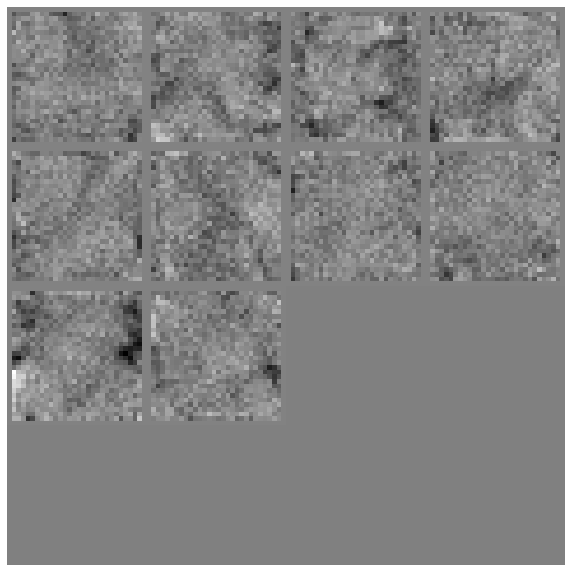

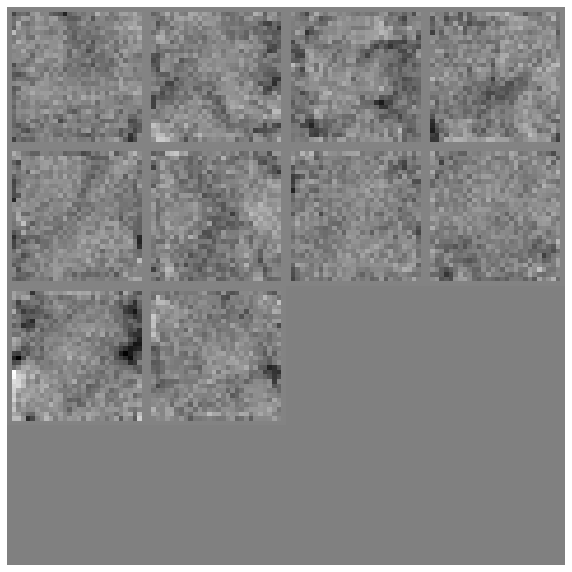

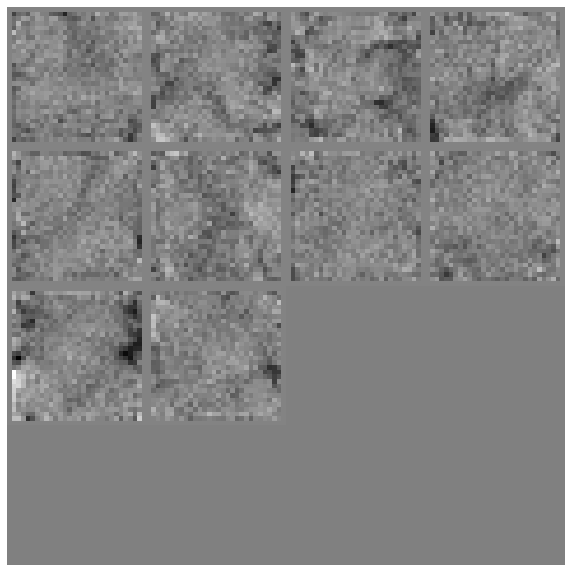

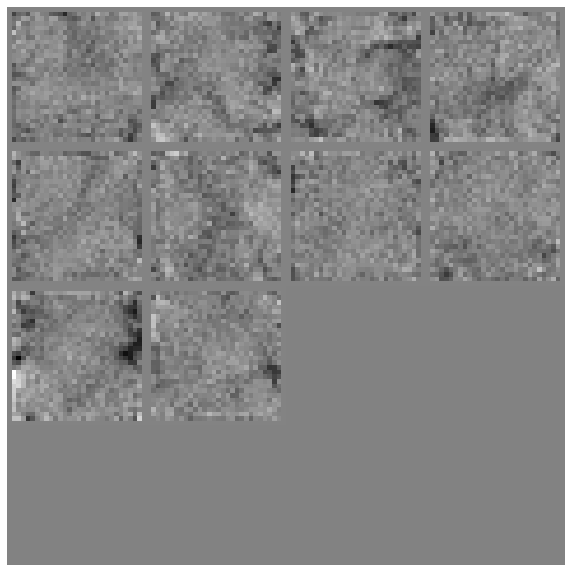

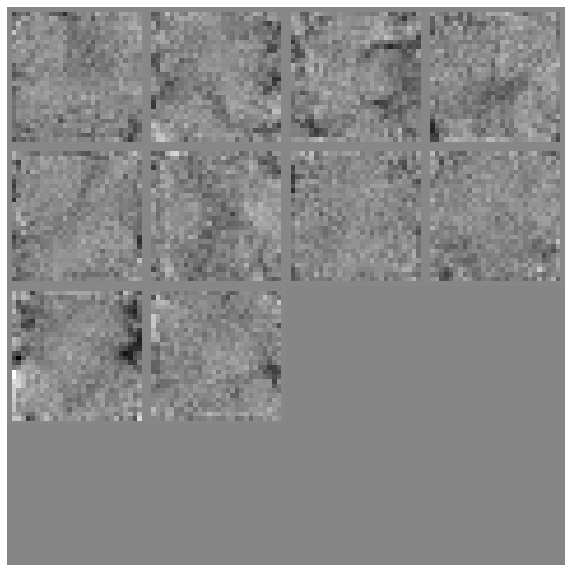

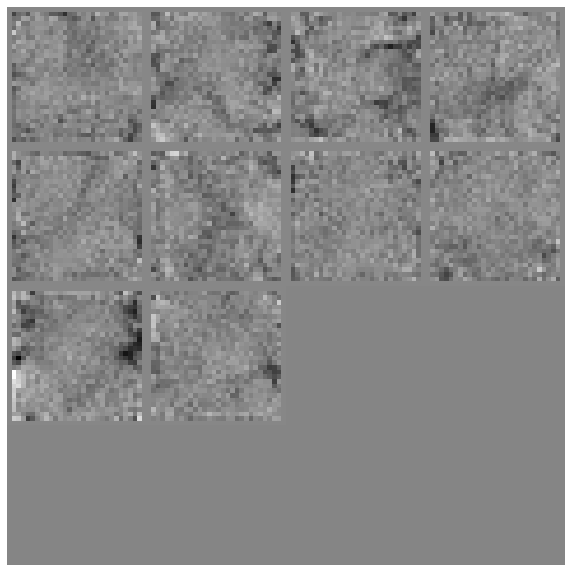

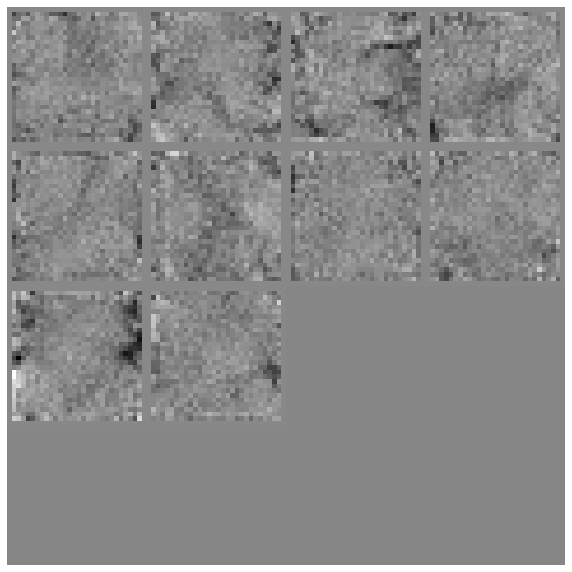

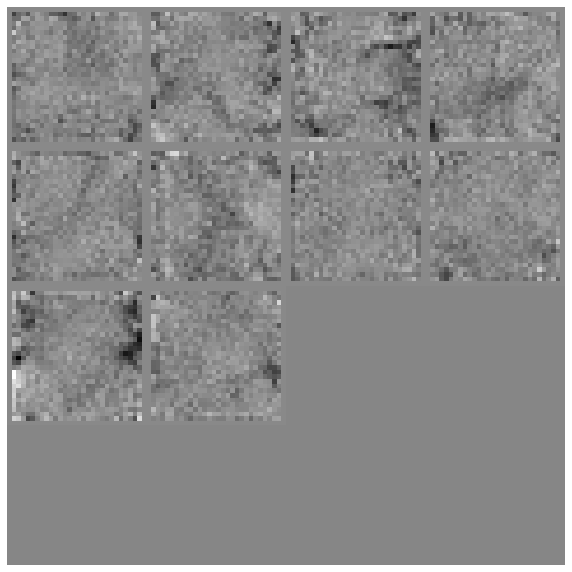

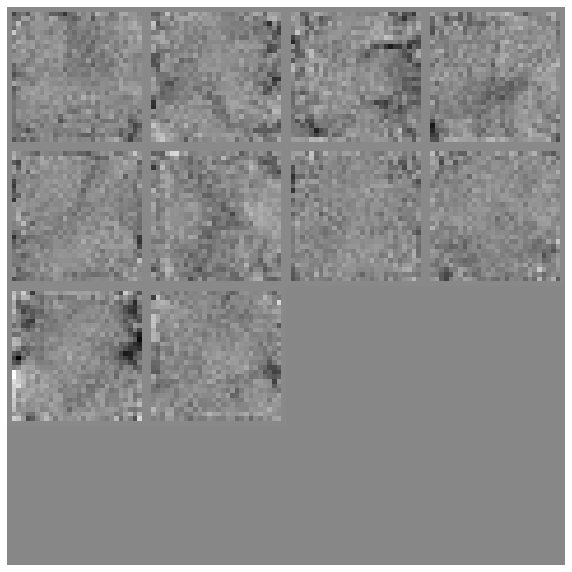

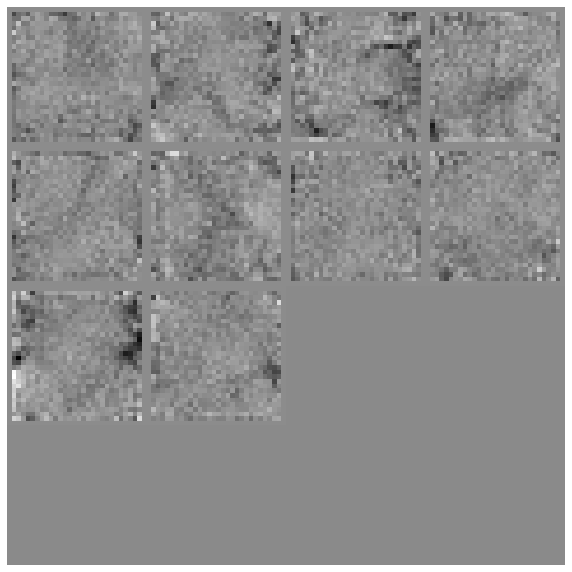

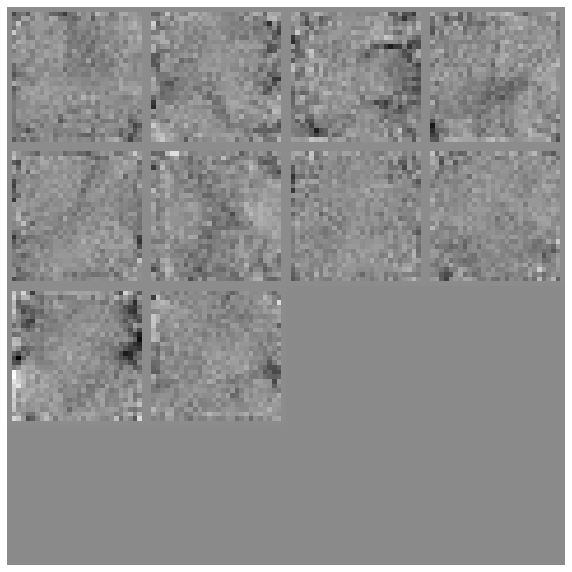

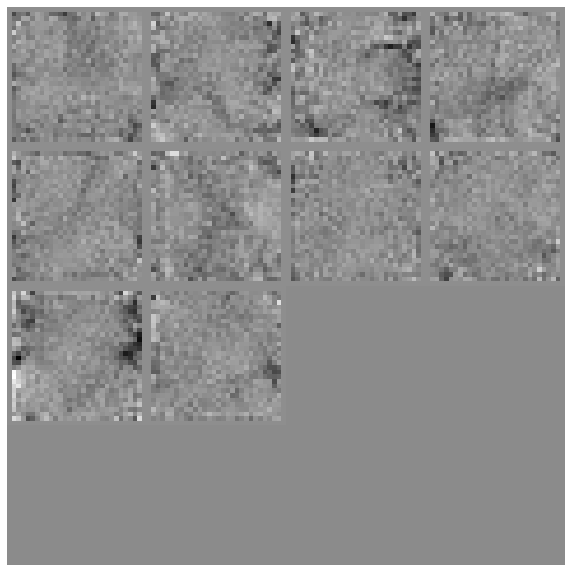

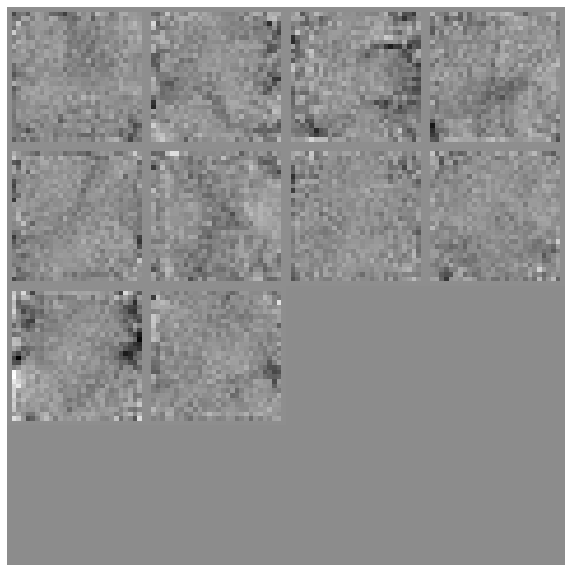

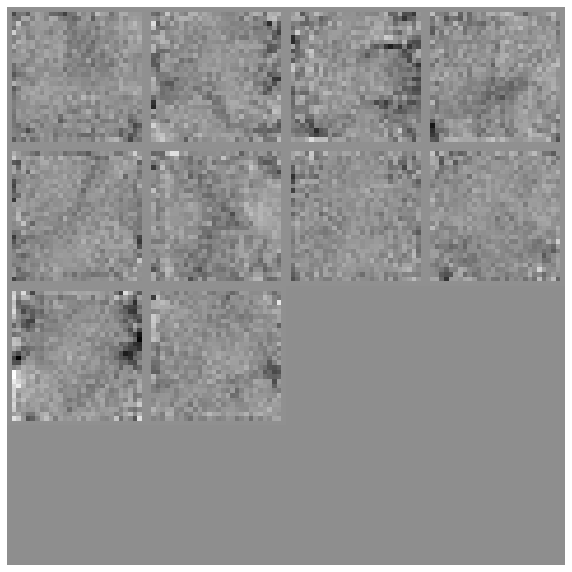

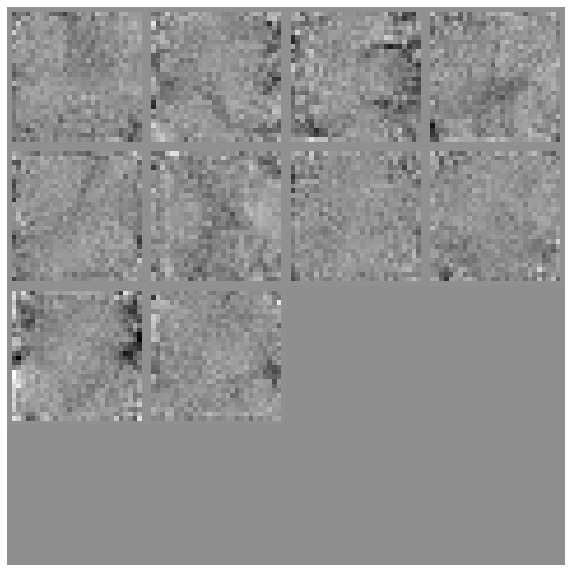

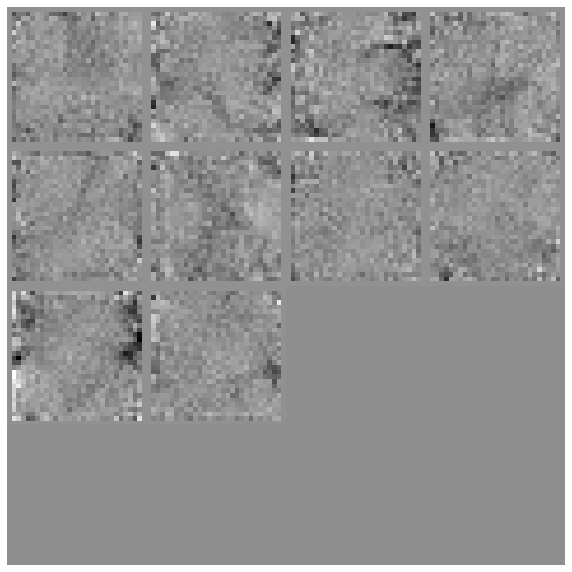

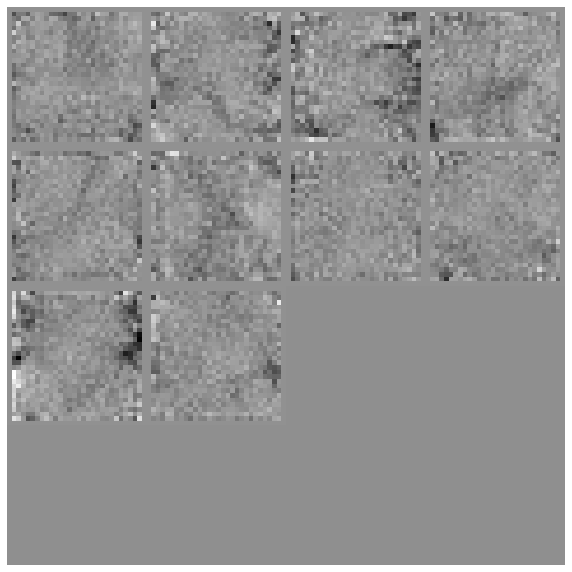

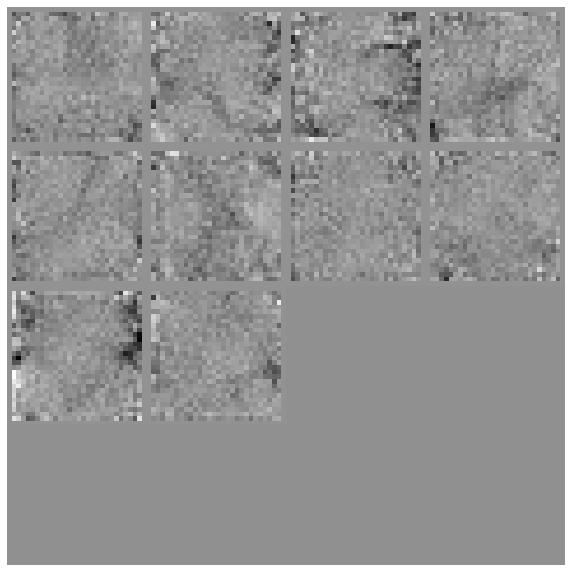

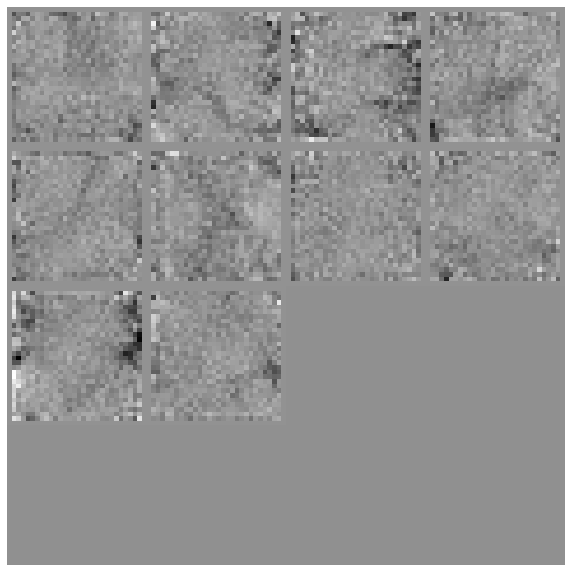

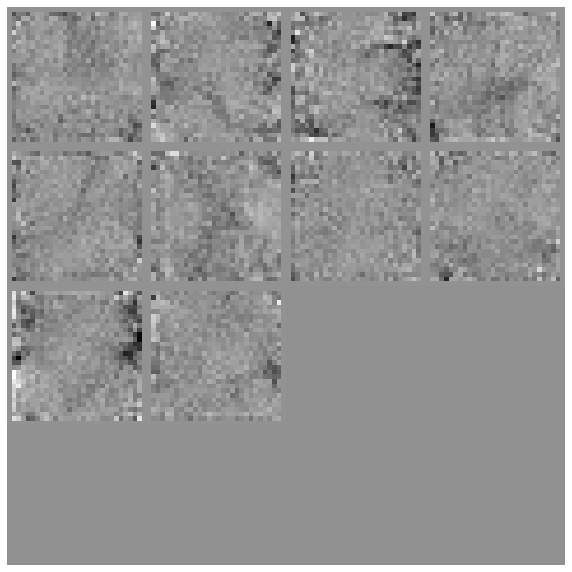

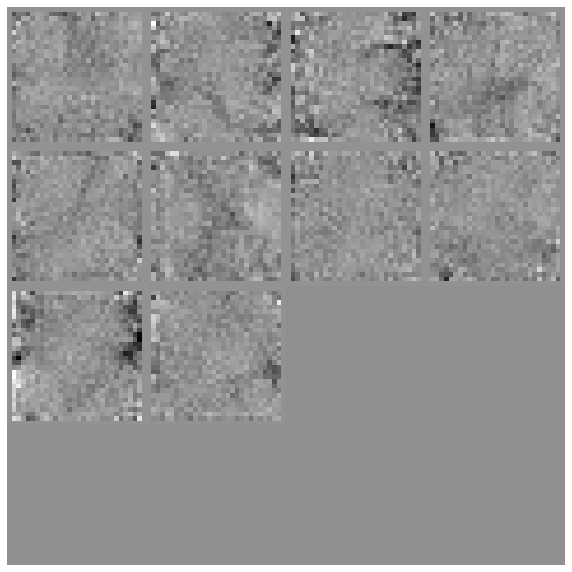

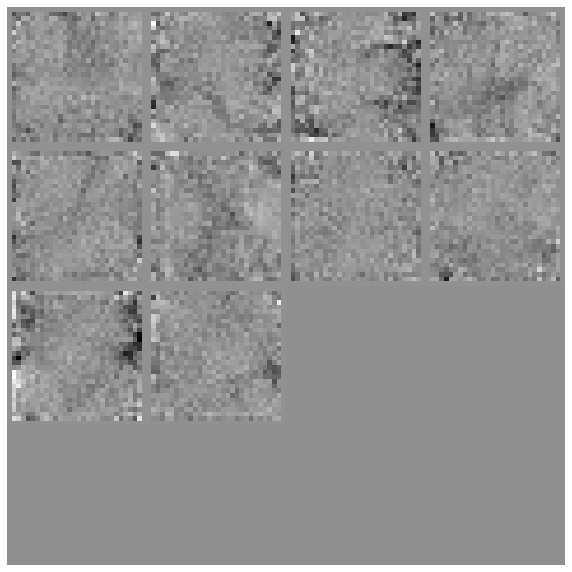

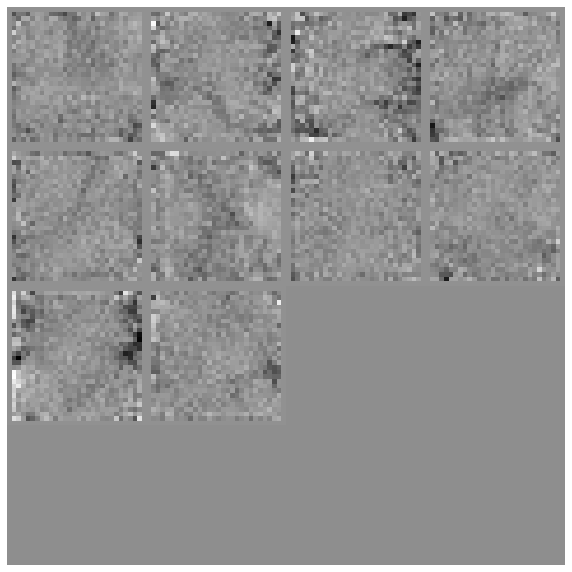

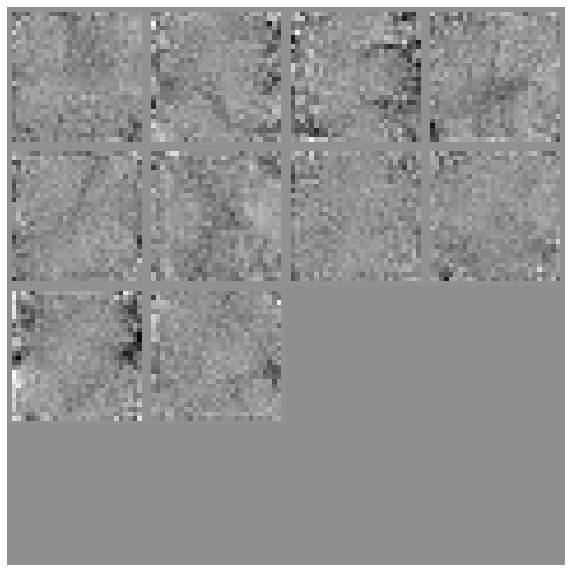

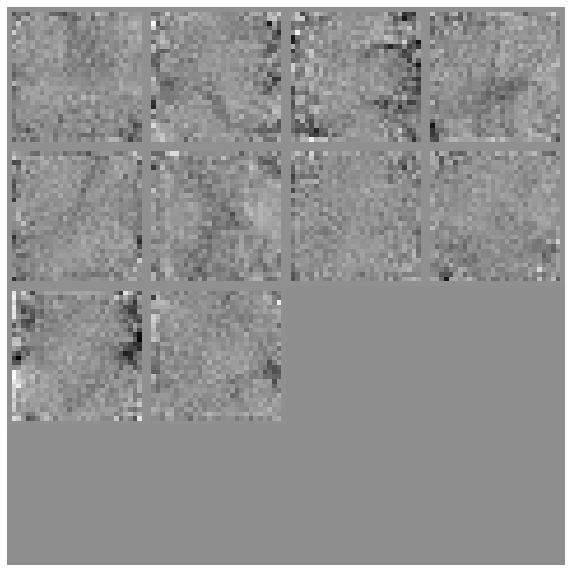

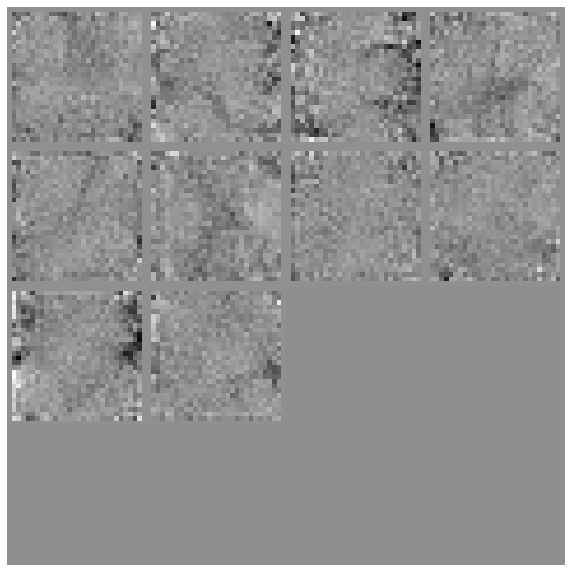

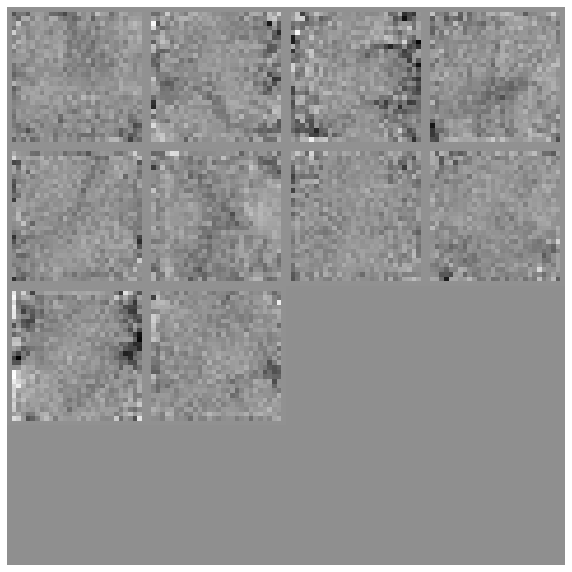

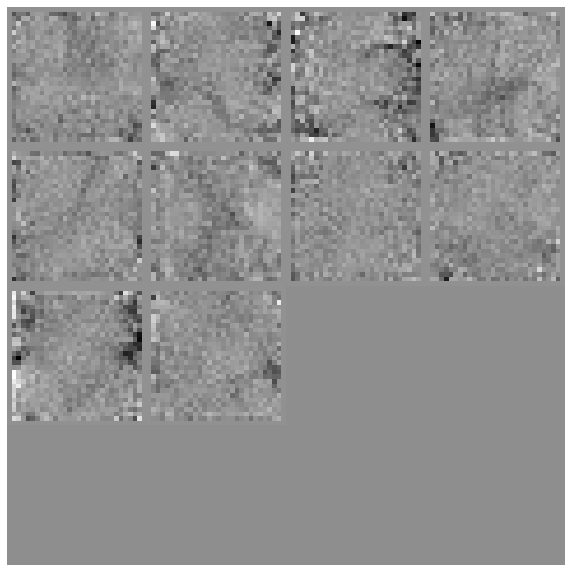

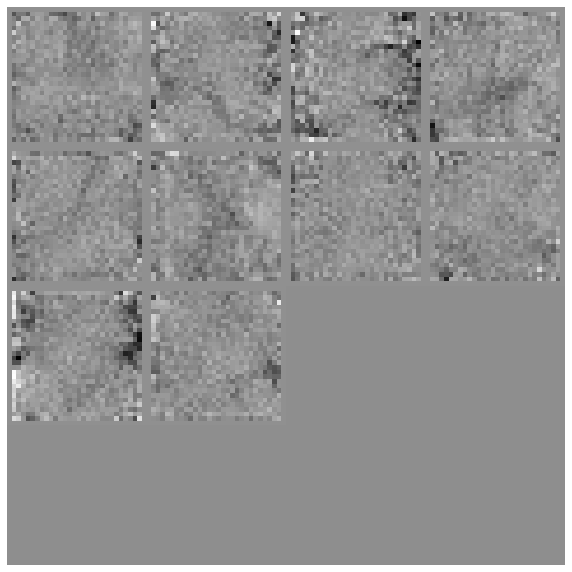

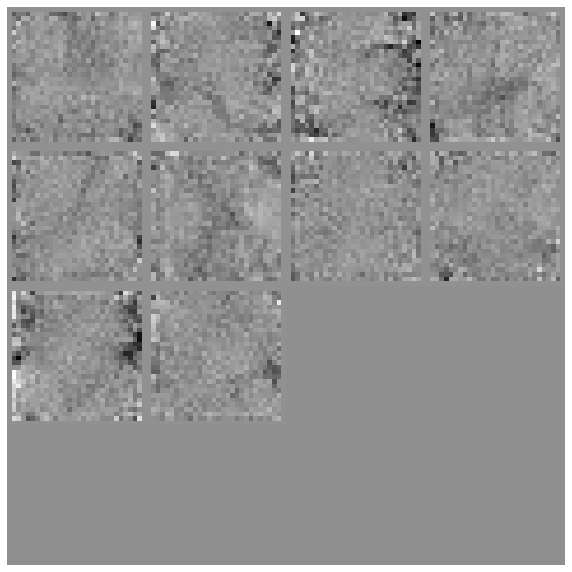

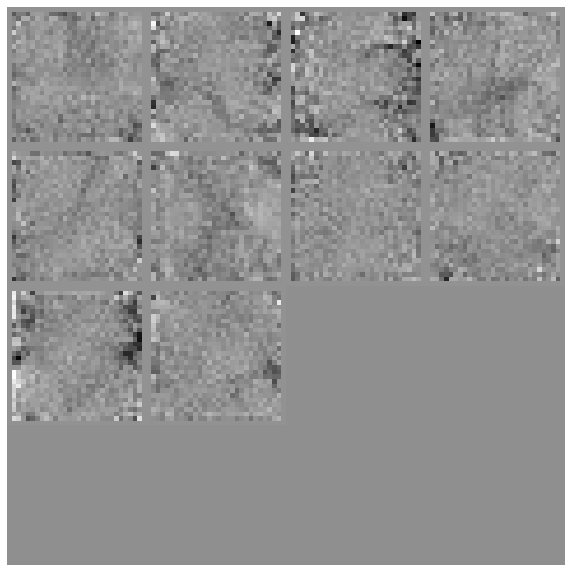

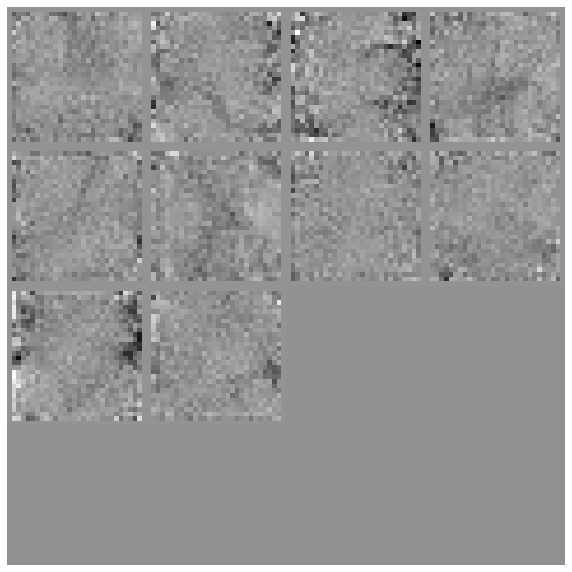

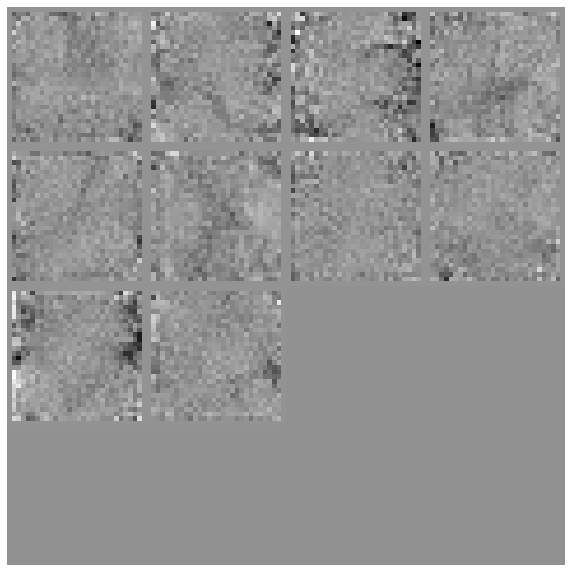

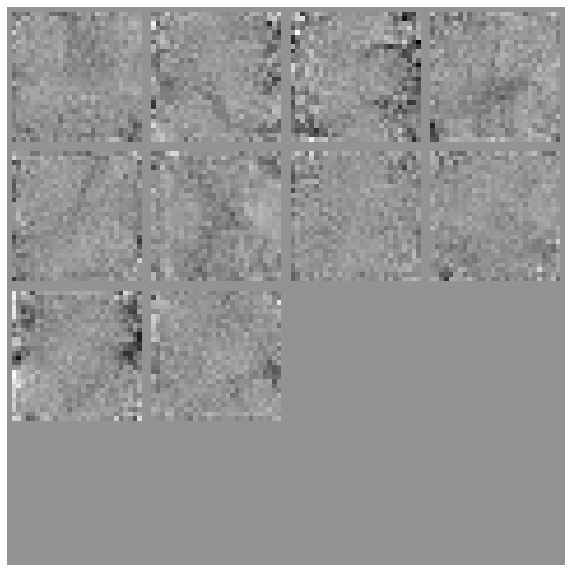

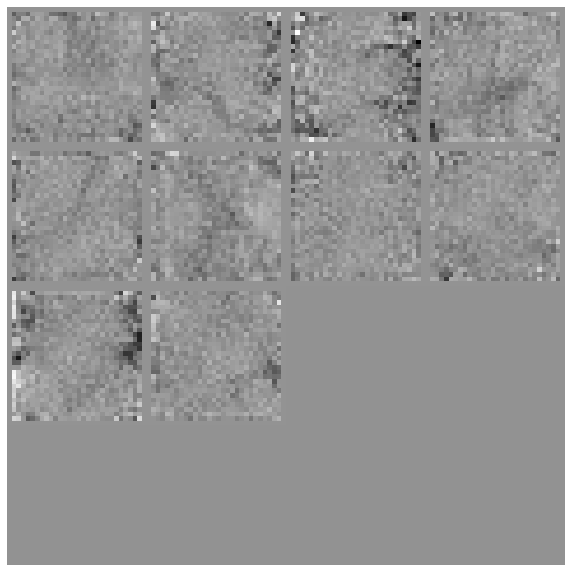

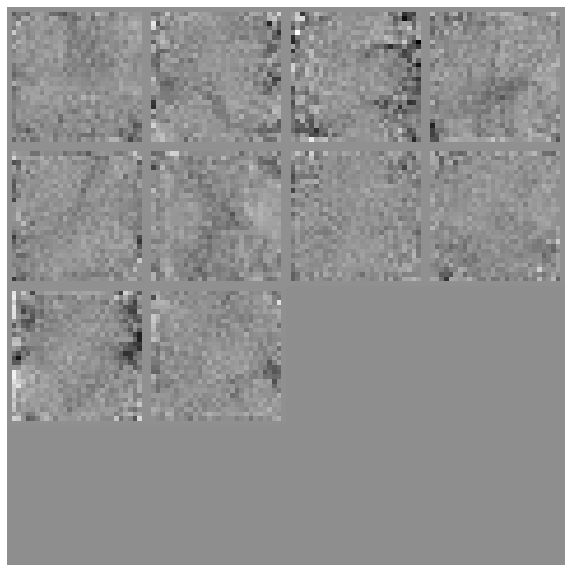

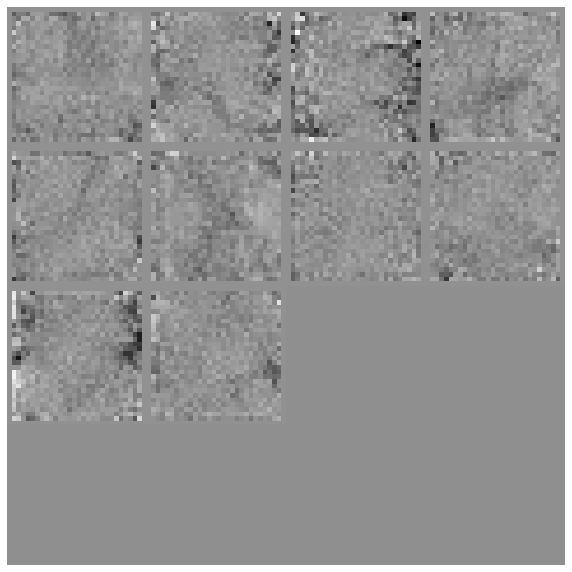

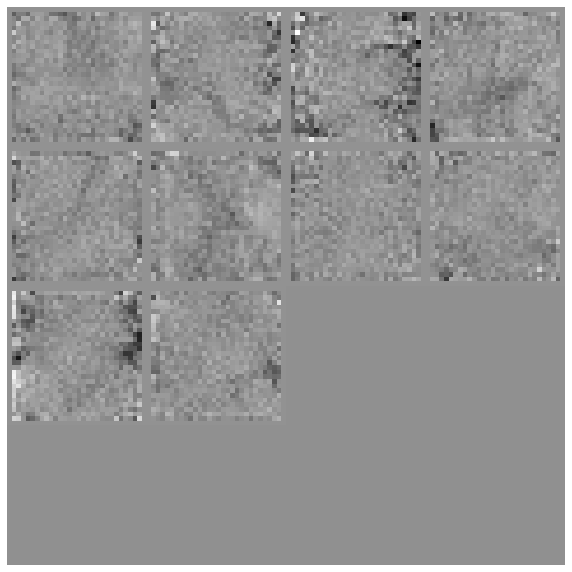

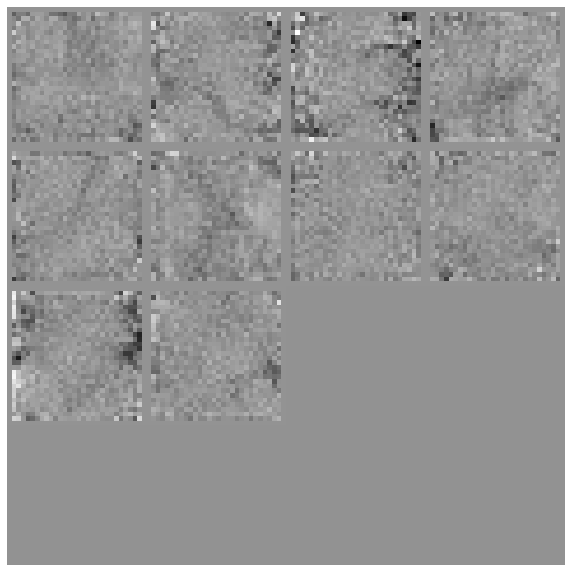

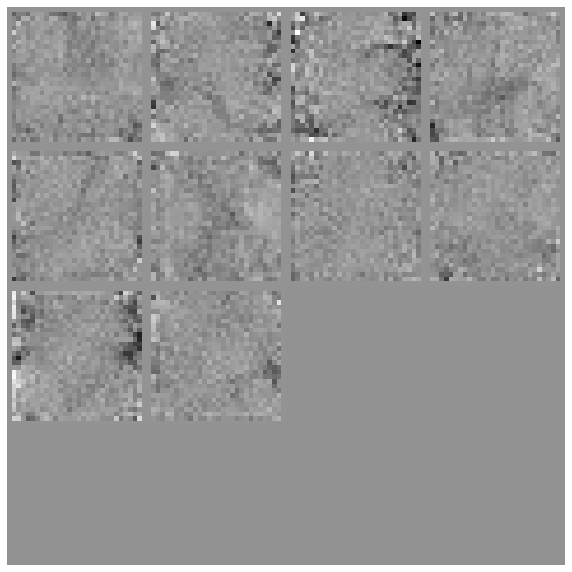

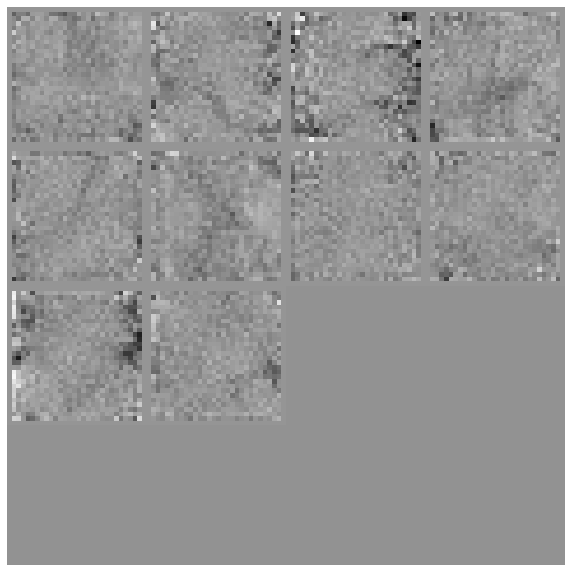

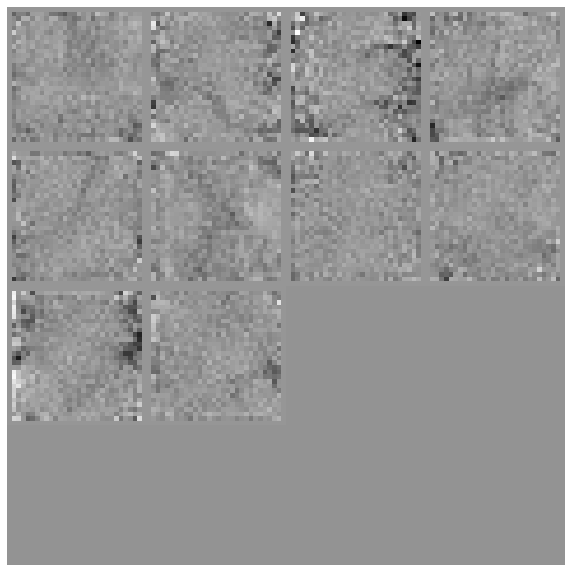

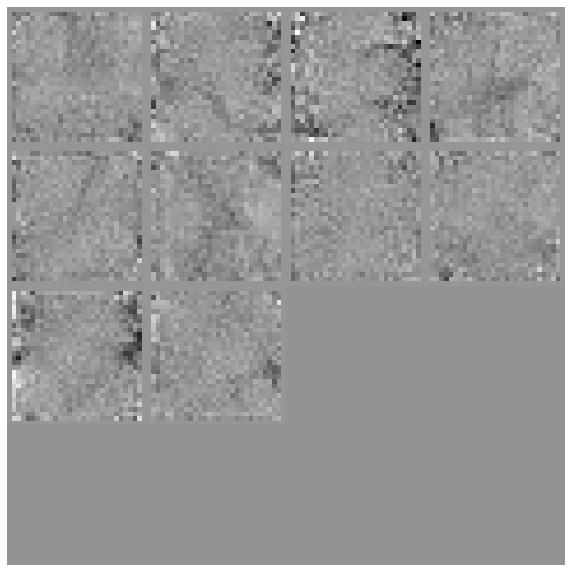

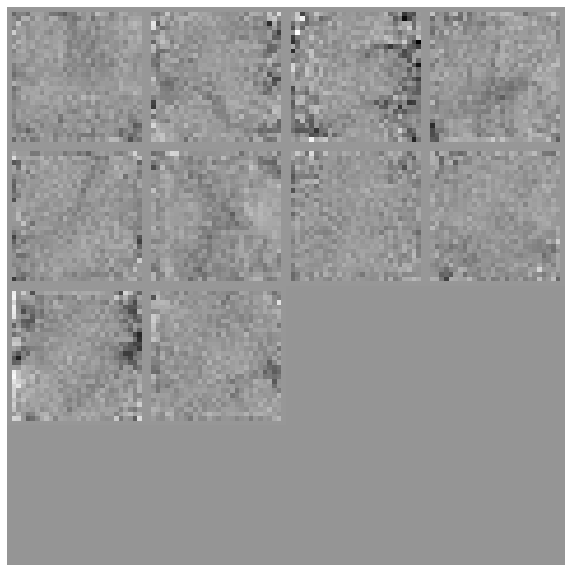

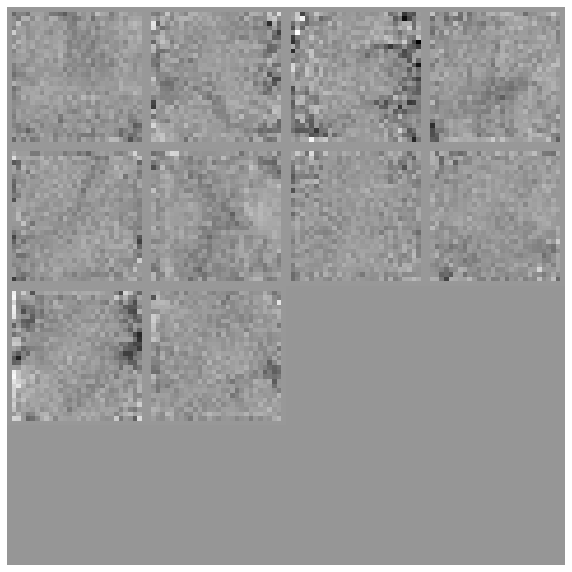

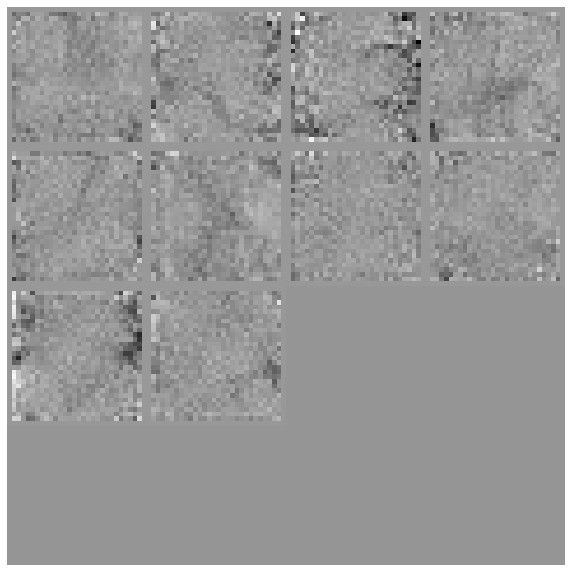

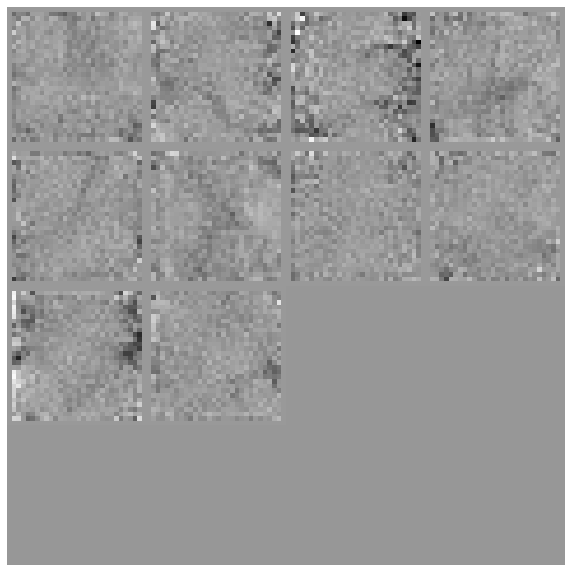

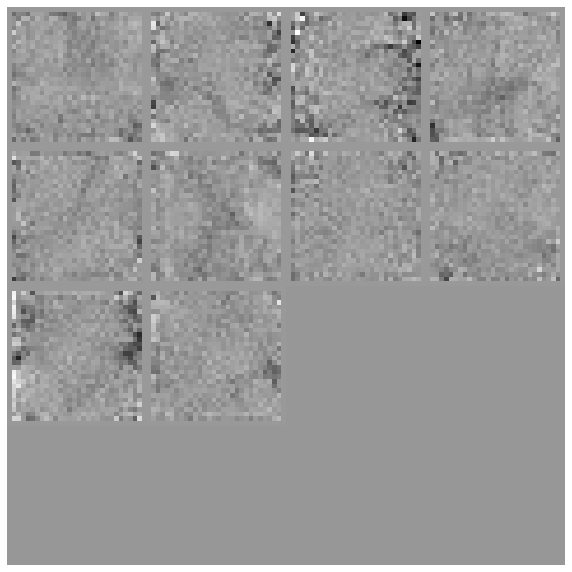

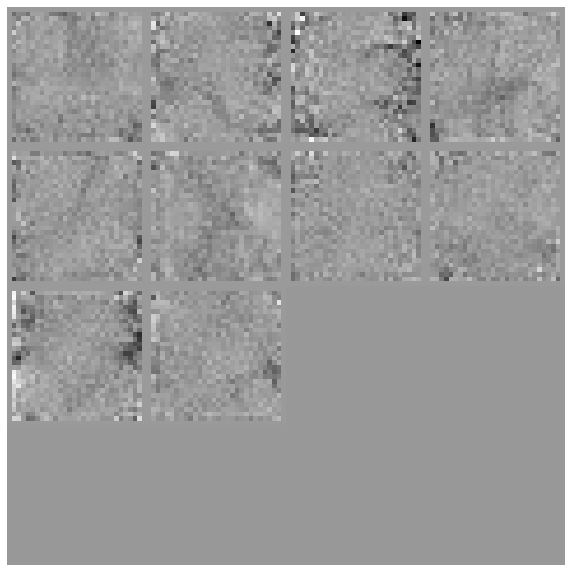

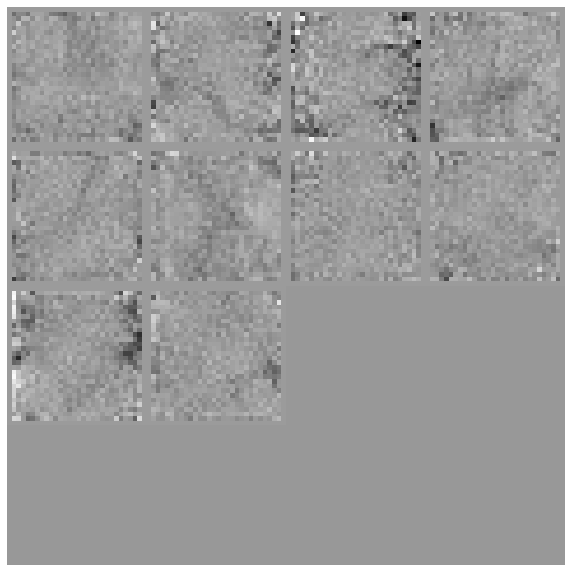

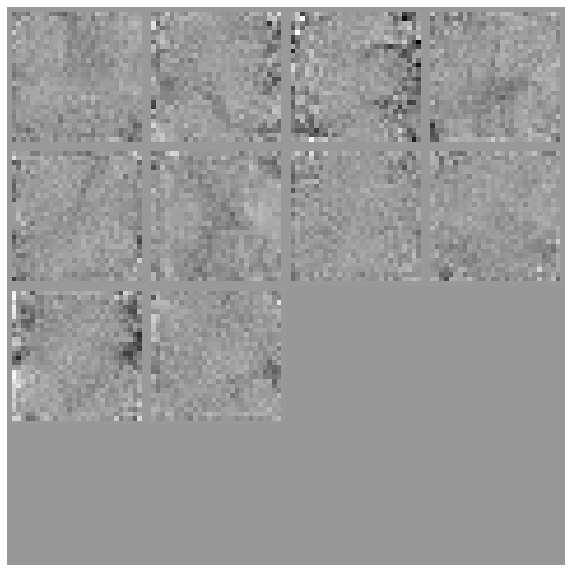

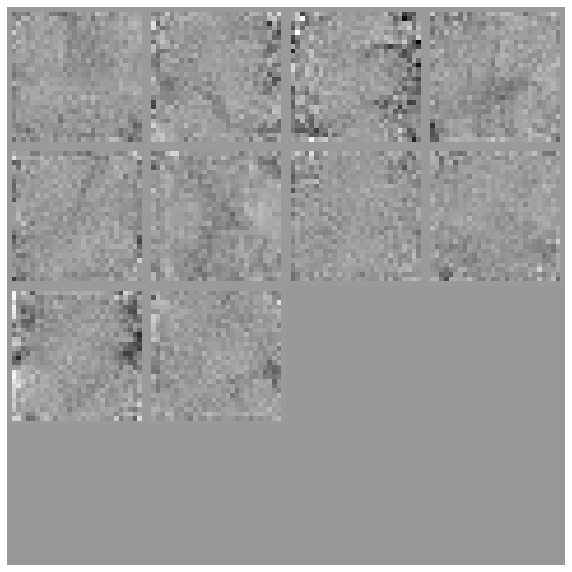

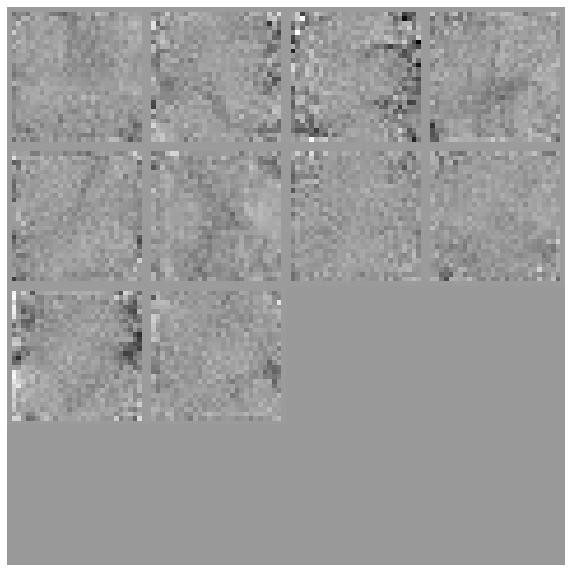

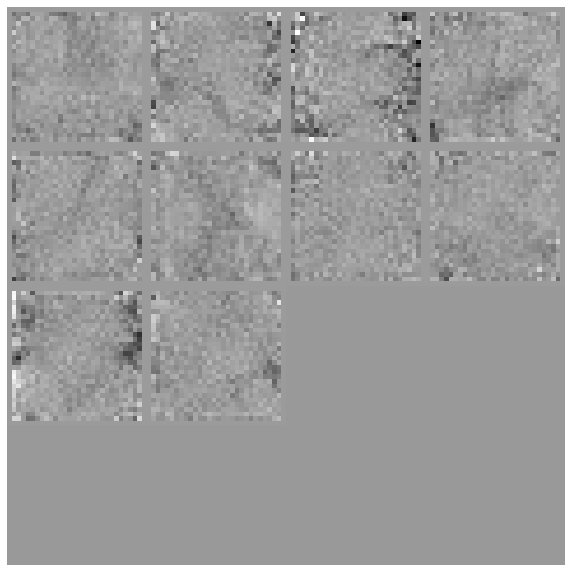

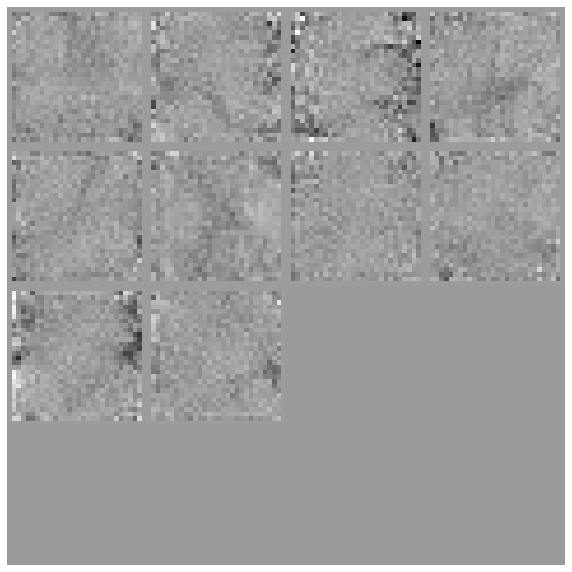

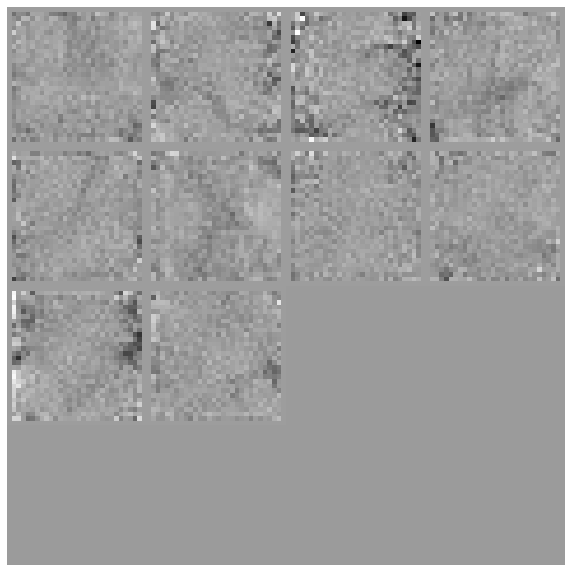

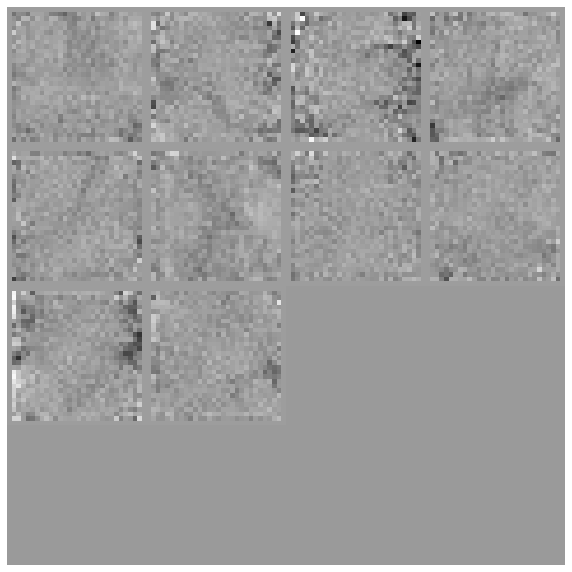

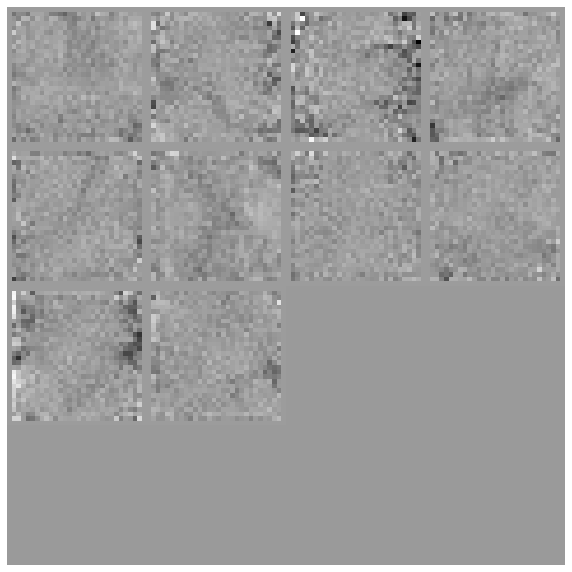

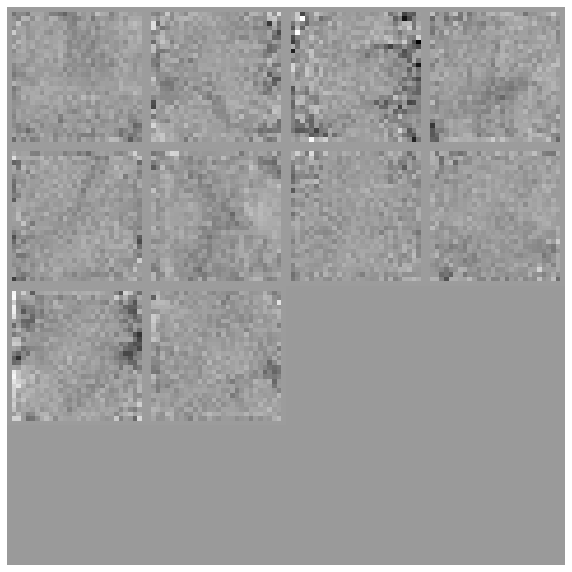

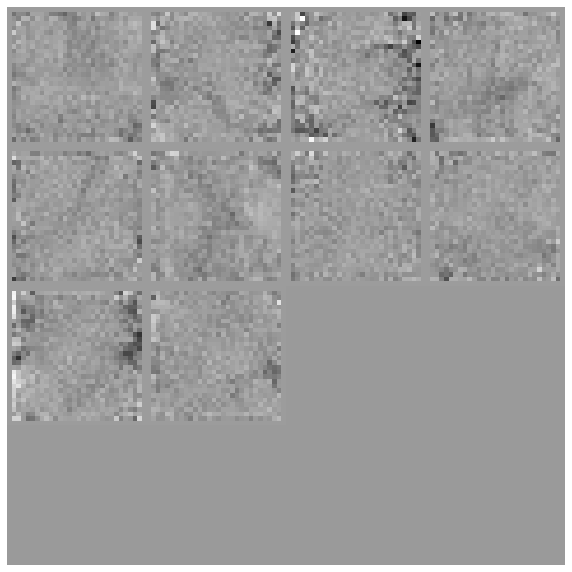

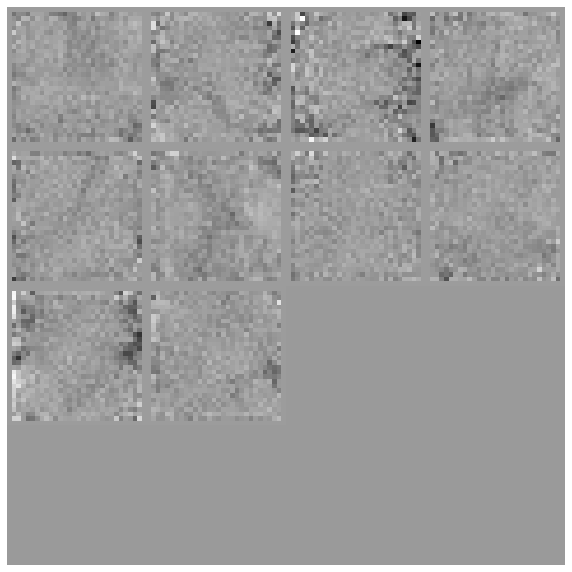

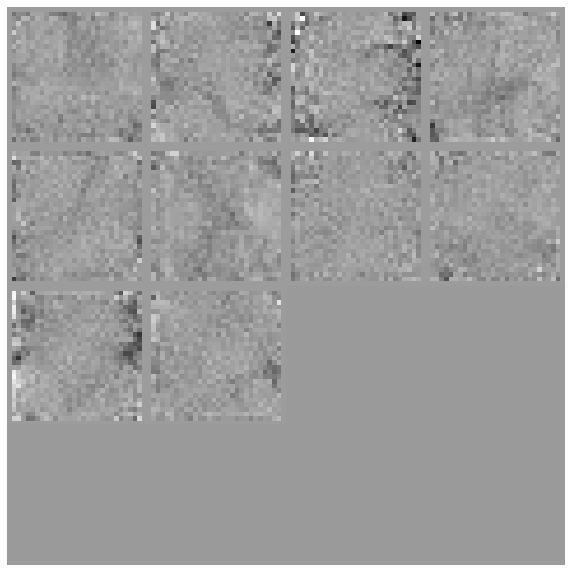

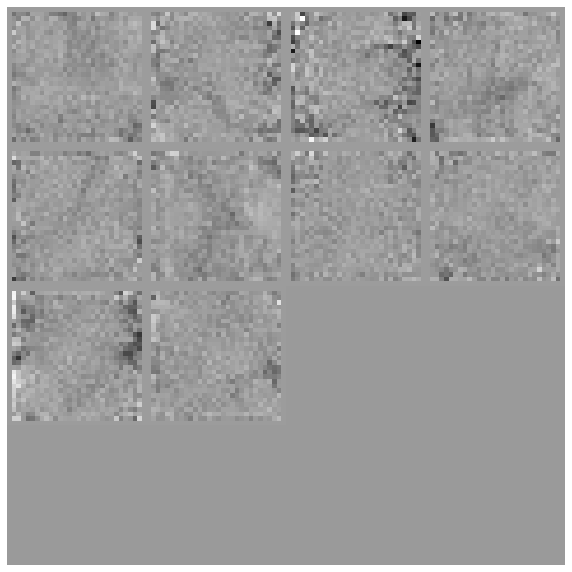

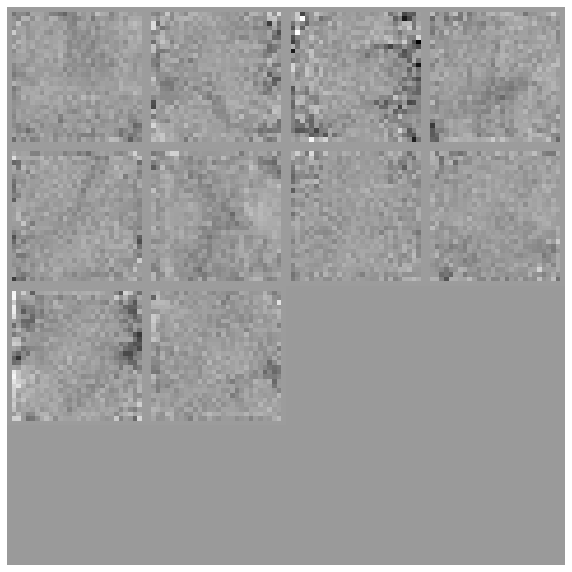

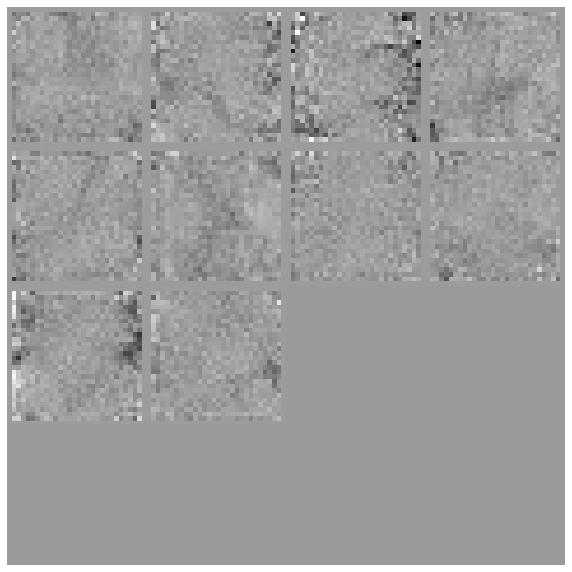

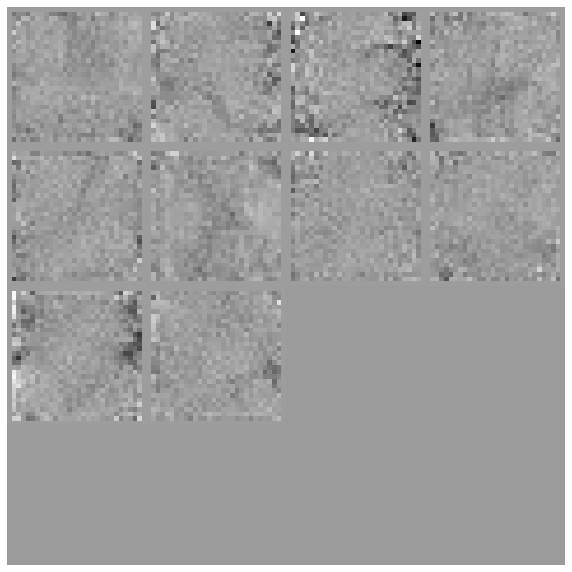

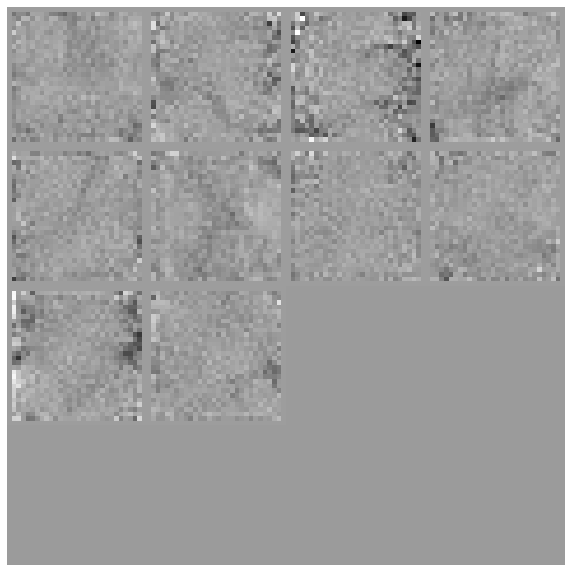

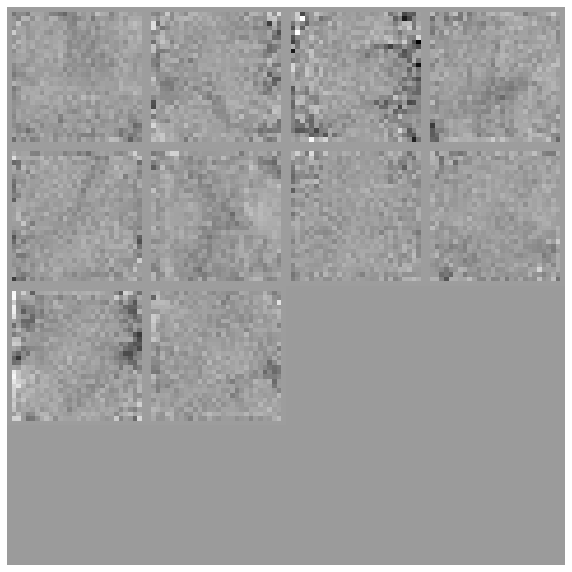

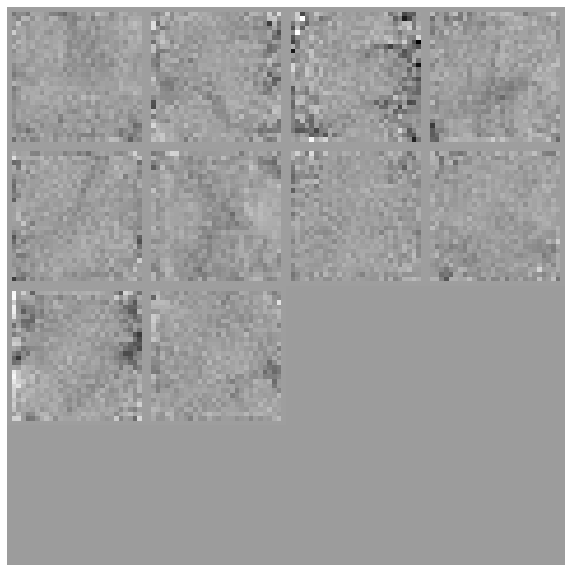

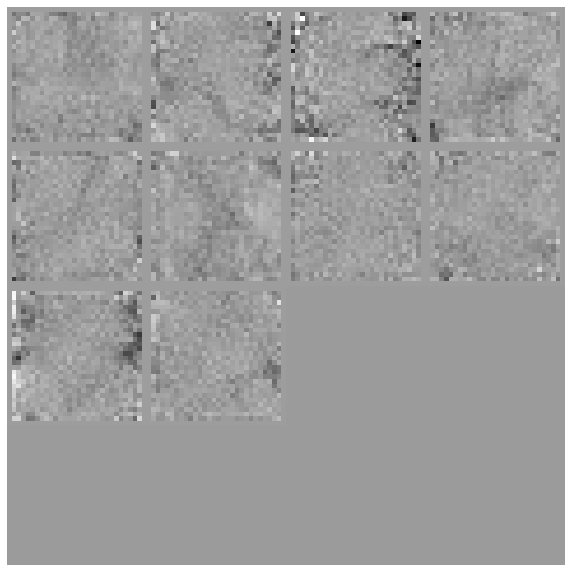

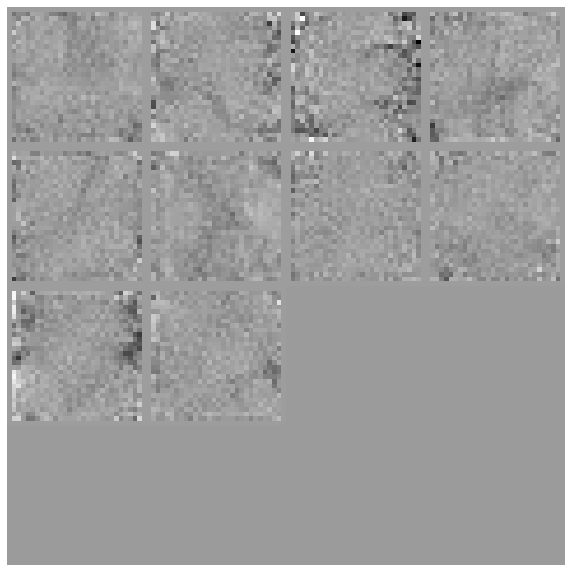

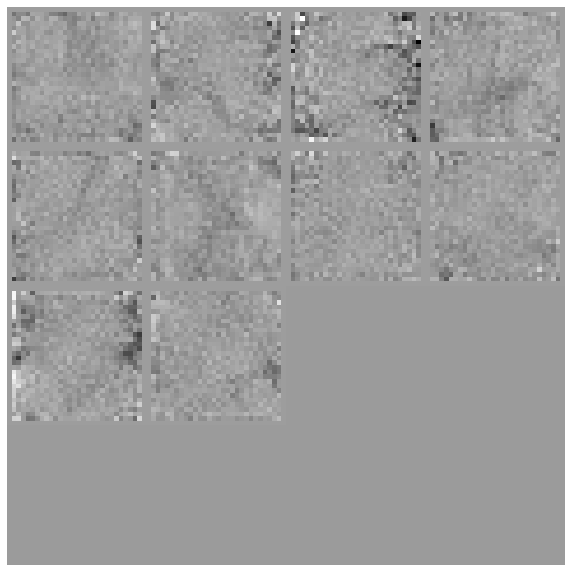

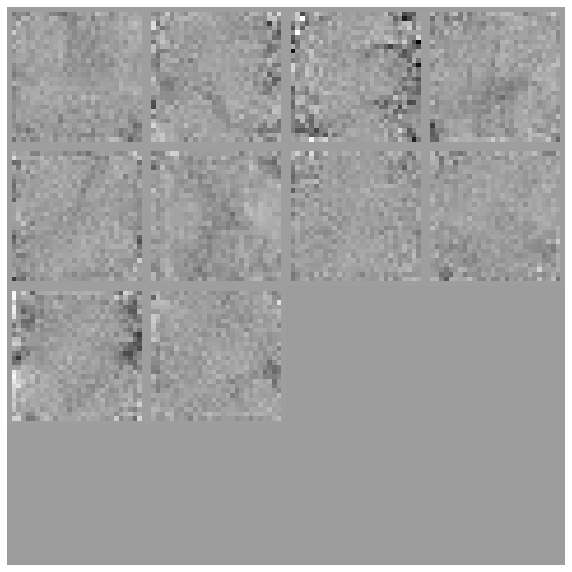

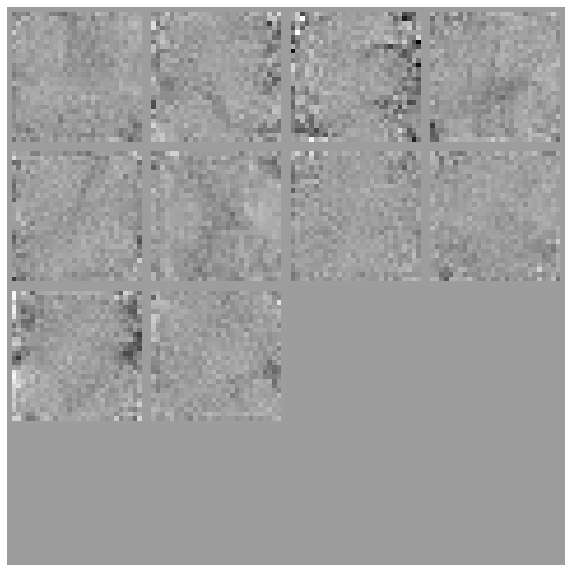

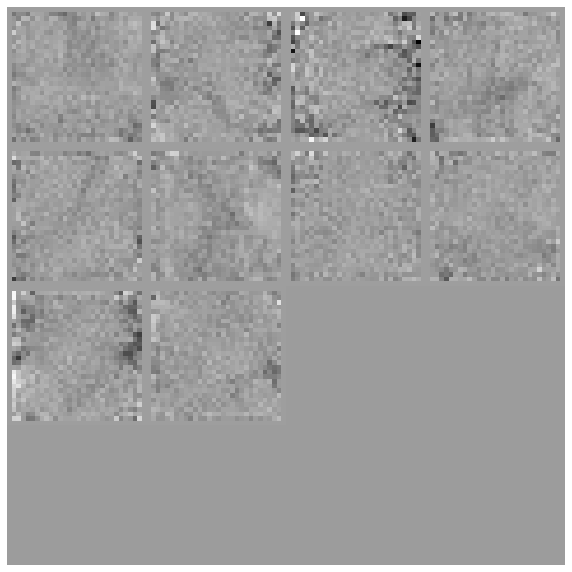

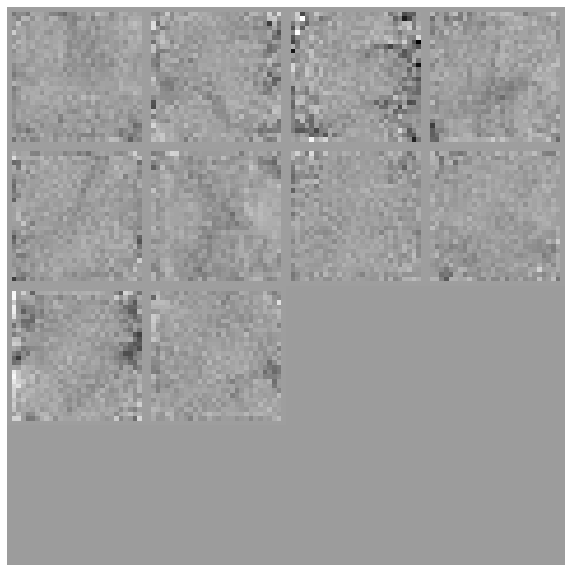

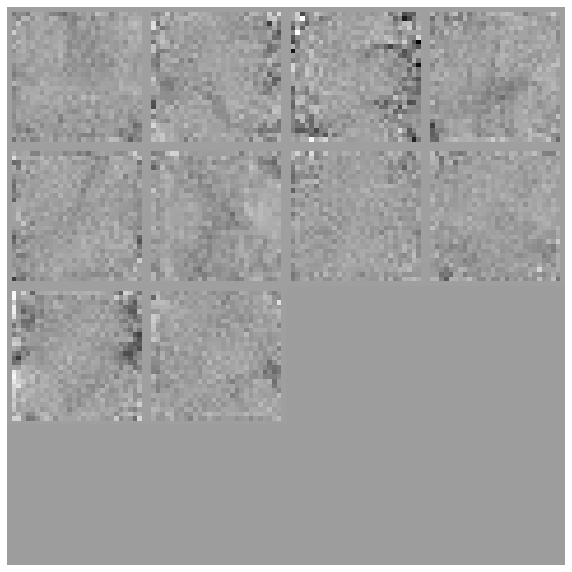

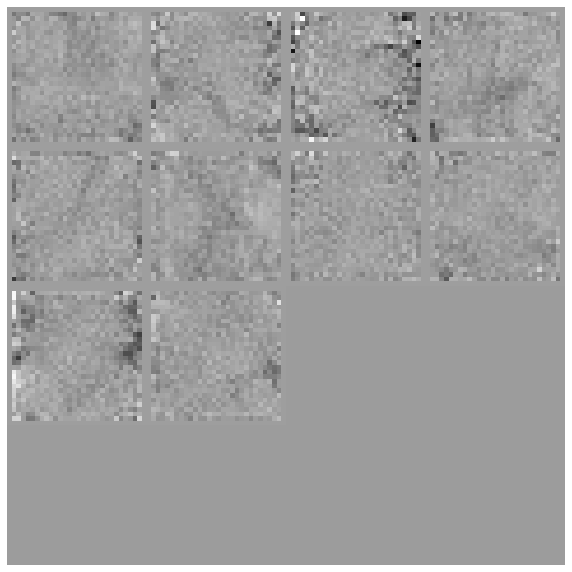

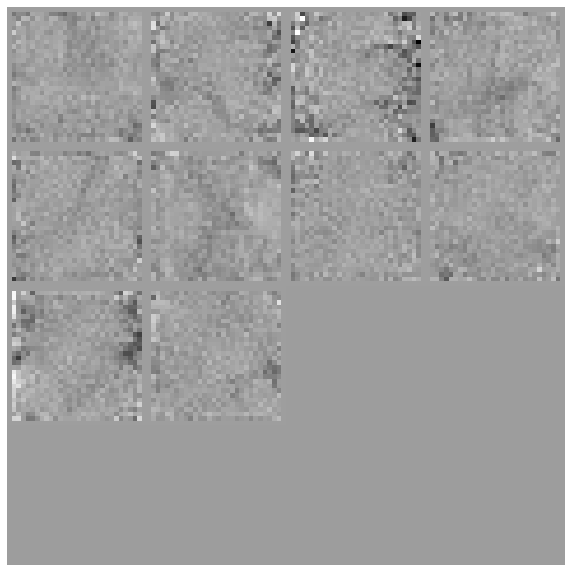

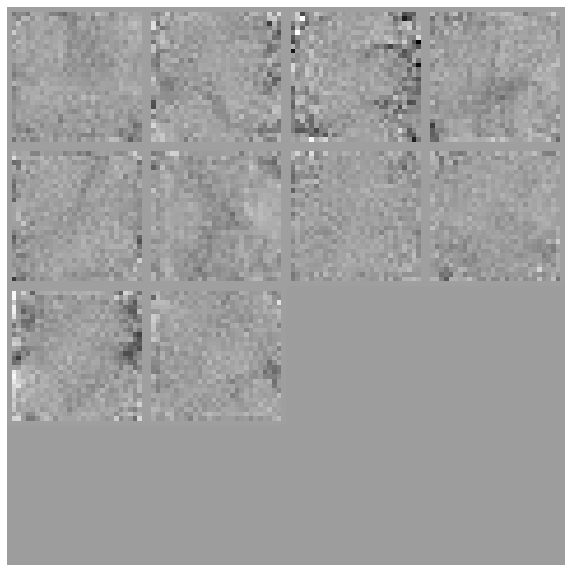

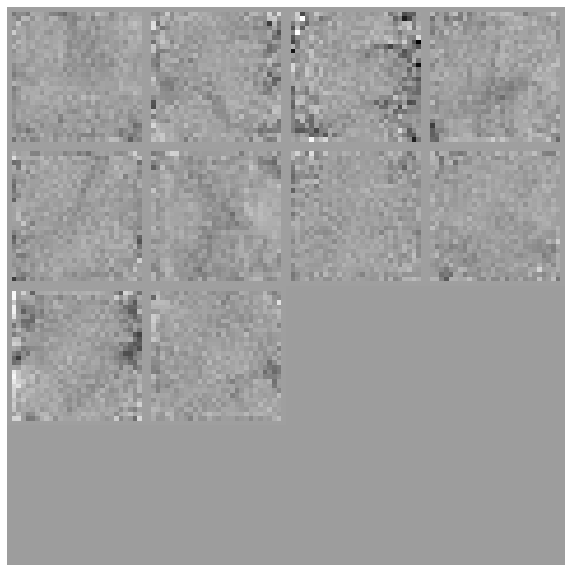

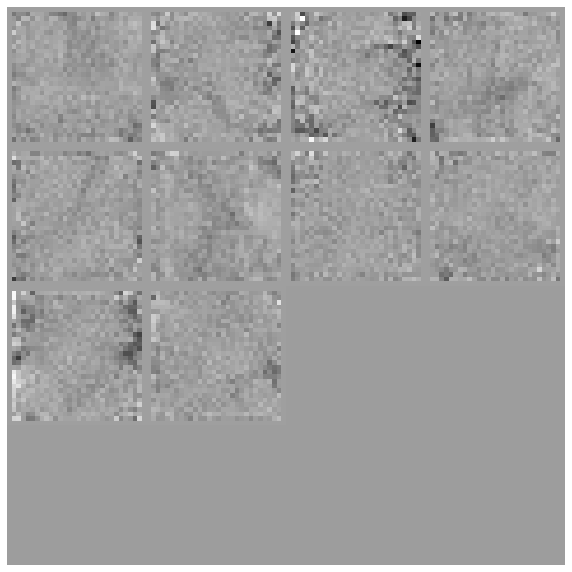

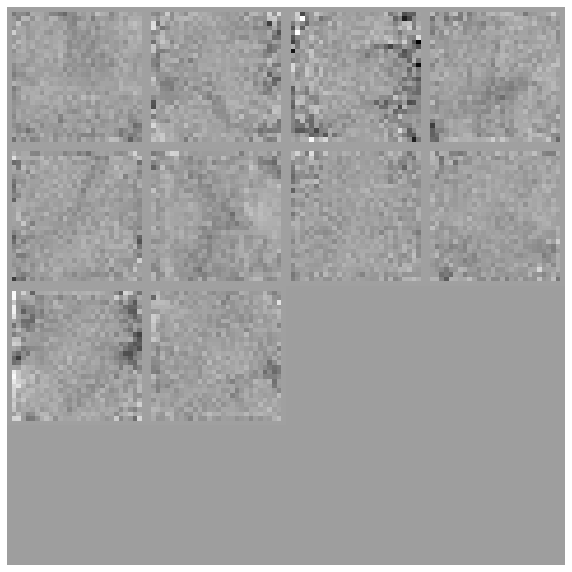

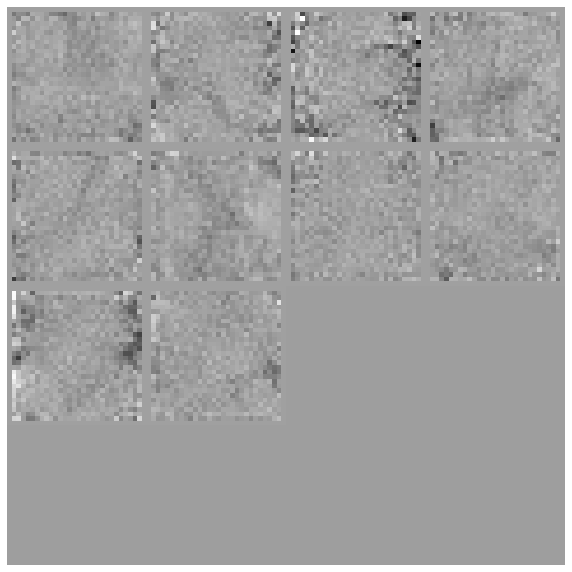

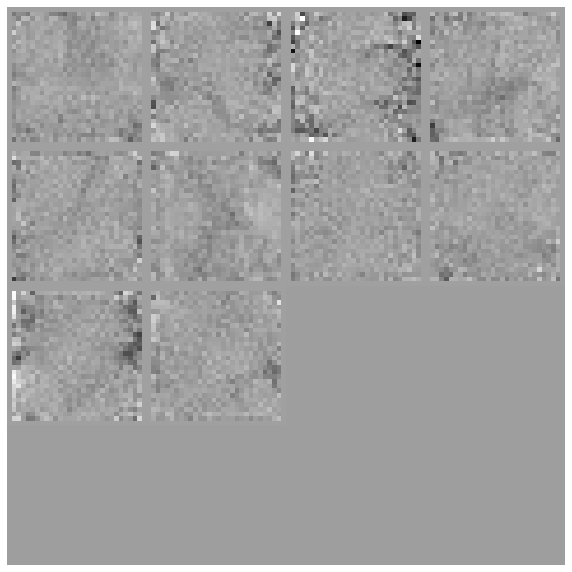

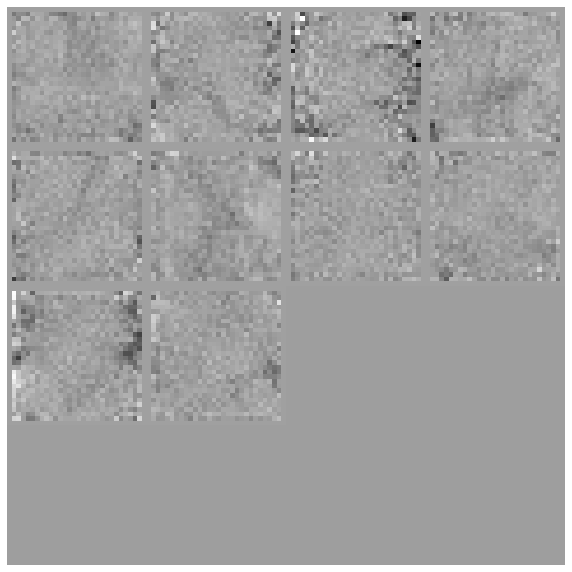

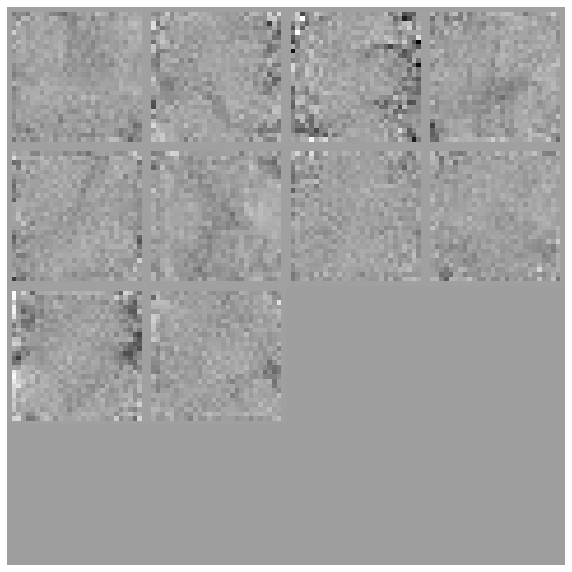

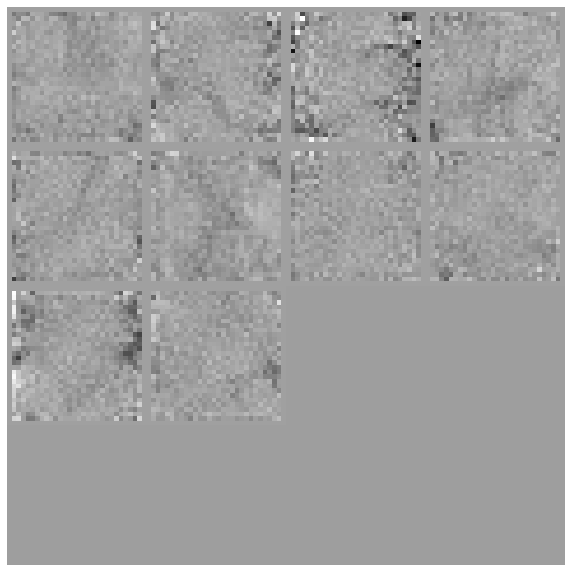

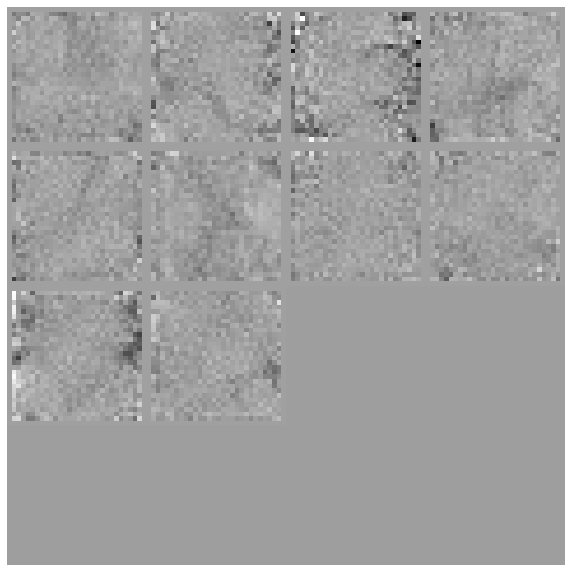

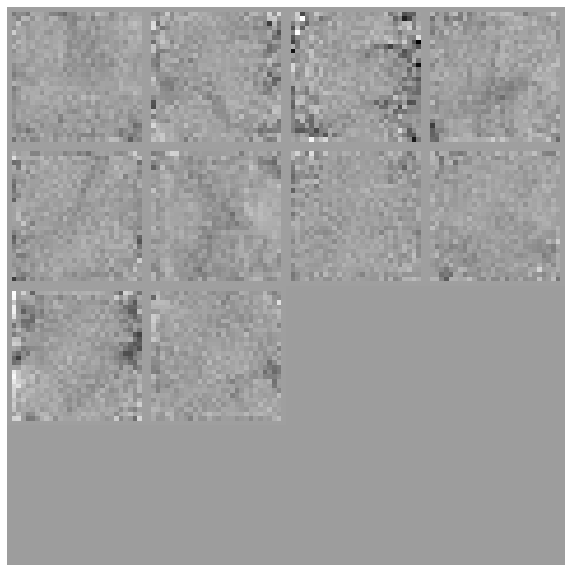

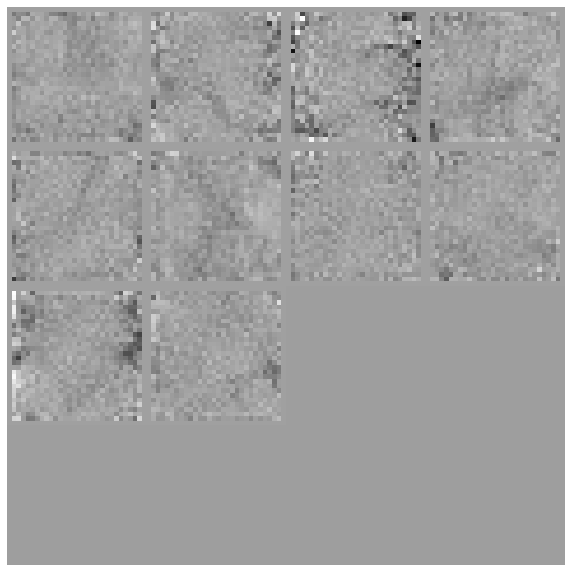

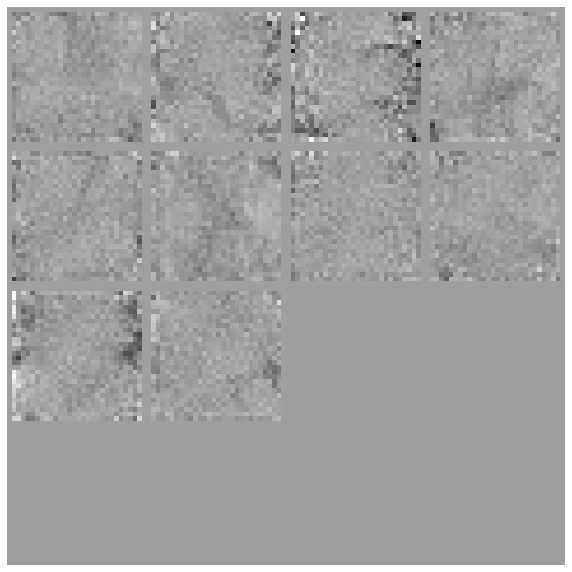

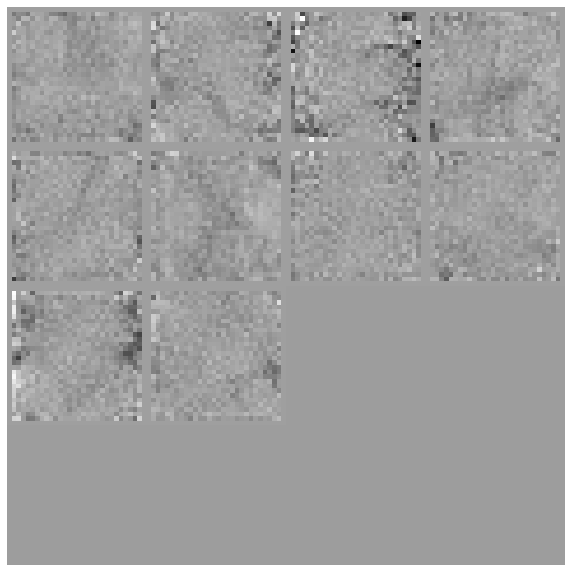

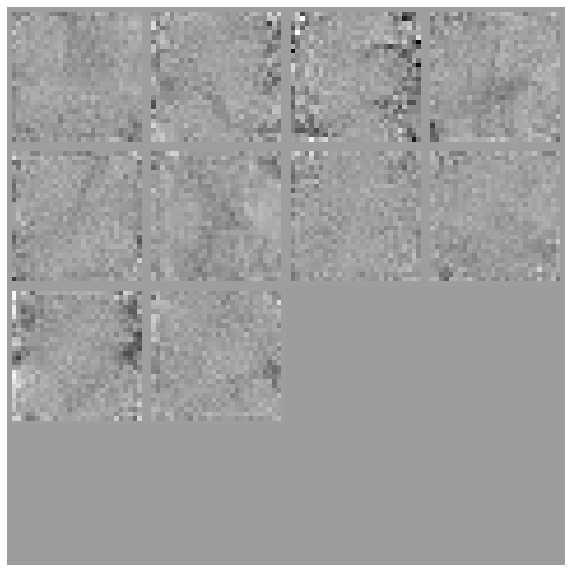

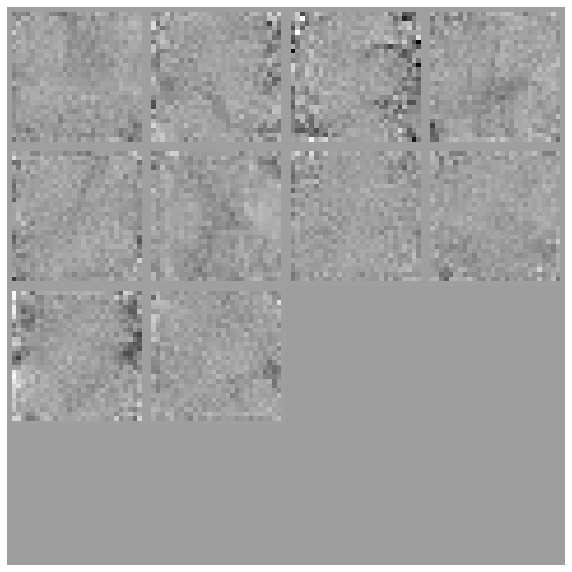

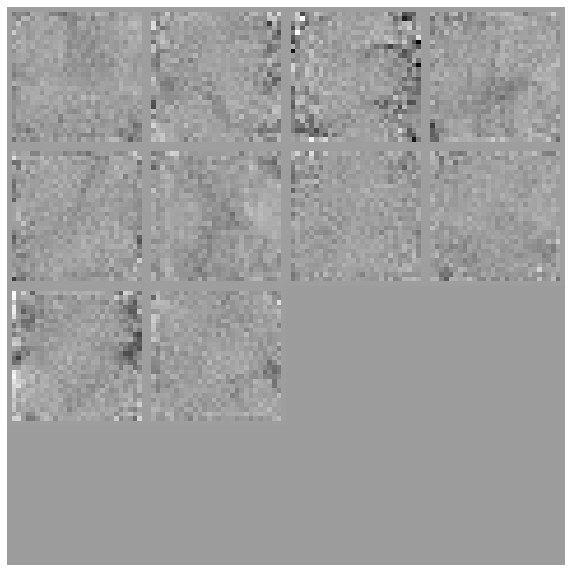

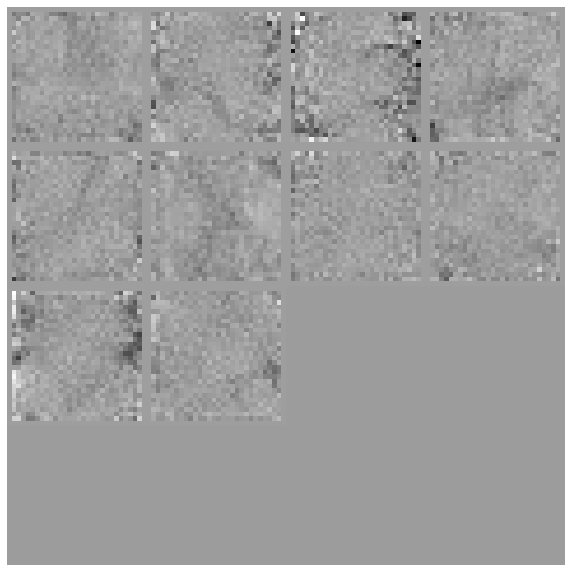

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h) #Optimization deals with selecting the best option among a number of possible choices that are feasible or don't violate constraints.


for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots() #Now tests can be run based on the data for the test, train, and loss.

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing